<a href="https://colab.research.google.com/github/nilesh3030/Stroke-Prediction/blob/main/Stroke_EDA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Stroke_Prediction/Data/stroke_case.csv', low_memory = False)
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(df.shape)
df.head()

(9997, 725)


,jaenan_sn,sn,fs,fdsn,car_numb,car_class,car_class_sub,call_method,control,distance,move,age,sex,address_si,address_gu,address_dong,address_happen_si,address_happen_gu,job,job_other,foreigner,nationality,address_f,address_f_else,sx1,sx2,sx3,sx4,sx5,delete1,disease,medical_history,hypertension,diabetes,stroke,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,renal_failure_sub,SI_disease,SI_disease_classifi,else,injury_delete1,injury_delete2,injury_delete3,injury_delete4,injury_delete9,injury_delete10,injury_delete5,injury_delete6,injury_delete7,injury_delete8,injury_detail_text1,crime1,crime2,crime3,crime5,avpu_time1,avpu,avpu_time2,avpu2,LR_lt_status,LR_lt_resp,LR_rt_status,LR_rt_resp,vital,vital_time1,dbp1,sbp1,pr1,rr1,bt1,spo2_1,mx_27_1,vital_time2,dbp2,sbp2,pr2,rr2,bt2,spo2_2,mx_27_2,triage,test1,test2,onset,onset_d,hosp1_1,hosp1_time1,hosp1_time1_1,distance1,dispostion1,dispostion1_sebu,dispostion_hosp1,dispostion_hosp_else1,dispostion_hosp2,dispostion_hosp_else2,impossible1,impossible1_else,hosp2,hosp2_1,hosp2_time2,hosp2_time2_1,distance2,dispostion2,impossible2,impossible2_else,transfer,no_transfer,no_transfer_text,mx_1,mx_2,mx_4,mx_3,mx_4_2,mx_4_1,mx_4_5,mx_4_4,mx_5,mx_6,mx_8_2,mx_8,mx_10,mx_10_1,mx_11,mx_12,mx_9,mx_12_1,mx_13,mx_13_text,mx_14,mx_15,mx_15_1,mx_15_2,mx_16,mx_18,mx_18_1,mx_18_2,mx_20,mx_20_1,mx_20_2,mx_20_8,mx_20_4,mx_20_5,mx_20_6,mx_20_7,mx_20_text,mx_21,mx_22,mx_23,mx_23_1,mx_24,mx_25,mx_26,mx_17_shock,mx_17_monitoring,mx_28_1,mx_28_2,mx_29,mx_29_text,obstacle16,obstacle1,obstacle12,obstacle15,obstacle2,obstacle3,obstacle4,obstacle5,obstacle6,obstacle13,obstacle8,obstacle9,obstacle10,obstacle11,dr2,dr_d,dr_method,dr_position,dr_position_text,dr_text1,dr_text2,dr_text2_3,dr_text2_2,dr_text3_2,dr_text3_1,dr_text4,dr_text5,dr_text6,dr_text7,dr_text8,dr_text9,dr_text20,dr_text21,dr_text22,dr_text23,dr_text24,dr_text10,dr_text11,dr_text12,dr_text13,dr_text26,dr_text27,dr_text16,dr_text17,dr_text18,dr_text25,dr_text28,dr_text19,sido,fsido,ems_sn,injury_detail,injury_else,call_d,call_t,start_d,start_t,field_d,field_t,contact_d,contact_t,depart_d,depart_t,arrival_d,arrival_t,back_d,back_t,id,mon,call_day,call_time,start_day,start_time,field_day,field_time,contact_day,contact_time,depart_day,depart_time,arrival_day,arrival_time,back_day,back_time,day,dr_text16_text,dr_text19_text,csido,year,cv_fs,cv_fdsn,cv_cc,cv1_cc,cv1_cc_text,cv1_onset,cv1_cc2_yn,cv1_cc2_1,cv1_cc2_2,cv1_cc2_3,cv1_cc2_4,cv1_cc2_5,cv1_cc2_6,cv1_cc2_7,cv1_cc2_9,cv1_cc2_10,cv1_cc2_8,cv1_cc2_8_text,cv1_act,cv1_act_text,cv1_site1,cv1_site2,cv1_site3,cv1_site4,cv1_site5,cv1_site6,cv1_site_text,cv1_pain1,cv1_pain2,cv1_pain3,cv1_pain4,cv1_pain5,cv1_pain6,cv1_pain_text,cv1_score_yn,cv1_score,cv1_pain2_yn,cv1_pain2_1,cv1_pain2_2,cv1_pain2_3,cv1_pain2_4,cv1_pain2_5,cv1_pain2_5_text,cv1_aggrav,cv1_aggrav_text,cv1_relief,cv1_relief_text,cv1_pain_time,cv1_hxng_yn,cv1_hxng_dose,cv1_hxng_num,cv1_impo_yn,cv1_impo_dose,cv1_impo_name,cv1_impo_time,cv1_ng_yn,cv1_ng_no,cv1_ng_no_text,cv1_ng_time1,cv1_pre_sbp1,cv1_pre_dbp1,cv1_pre_pr1,cv1_pre_nrs1,cv1_post_sbp1,cv1_post_dbp1,cv1_post_pr1,cv1_post_nrs1,cv1_ng_time2,cv1_pre_sbp2,cv1_pre_dbp2,cv1_pre_pr2,cv1_pre_nrs2,cv1_post_sbp2,cv1_post_dbp2,cv1_post_pr2,cv1_post_nrs2,cv1_ng_time3,cv1_pre_sbp3,cv1_pre_dbp3,cv1_pre_pr3,cv1_pre_nrs3,cv1_post_sbp3,cv1_post_dbp3,cv1_post_pr3,cv1_post_nrs3,cv1_post_yn,cv1_post_no,cv1_post_no_text,cv1_3ecg_yn,cv1_3ecg_no_why,cv1_3ecg_no_text,cv1_3ecg_eq,cv1_3ecg,cv1_3ecg_attach,cv1_3ecg_noattach,cv1_3ecg_noattach_text,cv1_3ecg_block,cv1_3ecg_wtachy,cv1_3ecg_ntachy,cv1_3ecg_text,cv1_3ecg_text2,cv1_3ecg_shoot_yn,cv1_3ecg_shoot_n_text,cv1_3ecg_shoot_n_text_etc,cv1_12ecg_send,cv1_12ecg_send_2,cv1_12ecg_nosend_text,cv1_12ecg_trsf,cv1_12ecg_notrsf,cv1_12ecg_notrsf_text,cv1_12ecg_attach,cv1_12ecg_noattach,cv1_12ecg_noattach_text,cv1_12ecg_st,cv1_12ecg_st1,cv1_12ecg_st2,cv1_12ecg_1,cv1_12ecg_2,cv1_12ecg_3,cv1_12ecg_aVR,cv1_12ecg_aVL,cv1_12ecg_aVF,cv1_12ecg_v1

In [4]:
# There are many junk columns that have been added so we will remove all of them 
#df = df.loc[:,:'pti2']
#print(df.shape)

In [5]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 1.4 MB 17.9 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=775306bad3c2101449cbd0159b50f87354c7f520aaa6e2f38eaf587e5fffe478
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [6]:
missing_variables = round((df.isna().sum()/len(df))*100,2)

In [7]:
type(missing_variables)

pandas.core.series.Series

In [8]:
missing_variables = missing_variables.loc[lambda x : x >= 30]

var_to_remove = missing_variables.index

len(var_to_remove)
### We have 453 columns that has more 30% null values so we will be dropping those variables for now.

453

In [9]:
var_to_remove = [e for e in var_to_remove if e not in ('sx2', 'sx3', 'sx4', 'sx5')]

len(var_to_remove)

449

In [10]:
data = df.drop(columns= var_to_remove)

In [11]:
print(data.shape)
#data.head()

## After removing the variables with high null values, we are left with the 272 variable and now we will explore and assess these varibles as per info and domain knowledge to get the relevant varibles for our analysis.

(9997, 276)


In [12]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  65


,distance,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,hosp1_time1,hosp1_time1_1,ems_sn,call_d,call_t,start_d,start_t,field_d,field_t,contact_d,contact_t,depart_d,depart_t,arrival_d,arrival_t,back_d,back_t,day,cv1,cv2,cv,cv_cc2,arrest,sbp1_f,pr1_f,spo2_1_f,cc2,cc3,cc4,cc5,cc6,cc7,len1,len2,len3,onset_t,onset6,ccphss,cmx27,csbp,cspo2,spo94,o2,rti,rti2,sti,sti2,tti,tti2,pti,pti2
0,2.0,55,84.0,168.0,92.0,20.0,35.3,96.0,96.0,186.0,96.0,20.0,35.3,97.0,2.020000e+11,2.020000e+11,2.020110e+12,20220225,754,20220225,758,20220225,804,20220225,806,20220225,816,20220225,829,20220225,930.0,25.0,0.0,1.0,1.0,1.0,0.0,168.0,92.0,96.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,54.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,10.0,3.0,12.0,3.0,13.0,4.0,35.0,4.0
1,5.7,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0,2.020000e+13,2.020000e+13,2.020110e+12,20220423,1540,20220423,1542,20220423,1552,20220423,1552,20220423,1605,20220423,1622,20220423,1705.0,23.0,1.0,1.0,1.0,1.0,0.0,87.0,64.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,12.0,3.0,13.0,4.0,17.0,5.0,42.0,5.0
2,1.5,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0,2.020000e+11,2.020000e+11,2.020110e+12,20220520,2003,20220520,2005,20220520,2012,20220520,2014,20220520,2025,20220520,2058,20220520,2203.0,20.0,1.0,1.0,1.0,1.0,0.0,94.0,84.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,9.0,3.0,13.0,4.0,33.0,5.0,55.0,6.0
3,1.5,86,87.0,163.0,140.0,18.0,40.0,93.0,76.0,171.0,136.0,13.0,40.3,94.0,2.020000e+13,2.020000e+13,2.020110e+12,20220102,2232,20220102,2235,20220102,2239,20220102,2243,20220102,2330,20220103,3,20220103,100.0,2.0,0.0,1.0,1.0,1.0,0.0,163.0,140.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,4232.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7.0,2.0,51.0,5.0,33.0,5.0,91.0,6.0
4,3.0,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0,2.020000e+13,2.020000e+13,2.020110e+12,20220117,730,20220117,734,20220117,740,20220117,741,20220117,759,20220117,821,20220117,850.0,17.0,0.0,1.0,1.0,1.0,0.0,155.0,110.0,87.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,4230.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0,3.0,19.0,5.0,22.0,5.0,51.0,6.0


In [13]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

# let's visualise the values of the categorical variables
data[cat_vars].head()

Number of categorical variables:  211


,jaenan_sn,sn,fs,fdsn,car_numb,car_class,call_method,control,move,sex,address_si,address_gu,address_dong,address_happen_si,address_happen_gu,job,foreigner,address_f,sx1,sx2,sx3,sx4,sx5,delete1,disease,medical_history,hypertension,diabetes,stroke,chest_disease,heart_disease,tuberculosis,hepatitis,liver,allergy,cancer,renal_failure,else,crime1,crime2,crime3,crime5,avpu_time1,avpu,avpu_time2,avpu2,LR_lt_status,LR_lt_resp,LR_rt_status,LR_rt_resp,vital,vital_time1,mx_27_1,vital_time2,triage,test1,onset,onset_d,hosp1_1,distance1,dispostion1,transfer,mx_1,mx_2,mx_4,mx_3,mx_4_2,mx_4_1,mx_4_5,mx_4_4,mx_5,mx_6,mx_8,mx_10,mx_10_1,mx_12,mx_9,mx_12_1,mx_13,mx_14,mx_15,mx_15_1,mx_16,mx_18,mx_18_1,mx_20,mx_20_1,mx_20_2,mx_20_4,mx_20_5,mx_20_6,mx_20_7,mx_21,mx_22,mx_23,mx_24,mx_25,mx_26,mx_17_shock,mx_17_monitoring,mx_28_1,mx_28_2,mx_29,mx_29_text,obstacle16,obstacle1,obstacle12,obstacle15,obstacle2,obstacle3,obstacle4,obstacle5,obstacle6,obstacle13,obstacle8,obstacle9,obstacle10,obstacle11,dr_text3_2,dr_text3_1,dr_text4,dr_text5,dr_text6,dr_text7,dr_text8,dr_text9,dr_text20,dr_text21,dr_text22,dr_text23,dr_text24,dr_text10,dr_text11,dr_text12,dr_text13,dr_text26,dr_text27,dr_text16,dr_text17,dr_text18,dr_text25,dr_text28,dr_text19,sido,fsido,mon,call_day,call_time,start_day,start_time,field_day,field_time,contact_day,contact_time,depart_day,depart_time,arrival_day,arrival_time,back_day,back_time,csido,year,cv_fs,cv_fdsn,cv_cc,cv1_site1,cv1_site2,cv1_site3,cv1_site4,cv1_site5,cv1_site6,cv1_pain1,cv1_pain2,cv1_pain3,cv1_pain4,cv1_pain5,cv1_pain6,cv_etc,cv2_cc,cv2_phx_yn,cv2_act,cv2_onset_type,cv2_phss,cv2_laphss,cv2_laphss_asym,cv2_laphss_age,cv2_laphss_seizure,cv2_laphss_onset,cv2_laphss_bedridden,cv2_laphss_bst,cv2_cphss_mental,cv2_severity_gaze,cv2_severity_age,cv2_severity_armweak,cv2_severity_motion,cv2_severity_result,cv2_cphss,cv_hel,cv_prenoti,cv_call_d,cv_call_t,sbp2_f,pr2_f,spo2_2_f,cc1,cc8,cc9,conset,call_dt0,call_dt,cdecision
0,WP1139549467,20221100106M00459,중부소방서,회현119안전센터,998마2342,특수일반,휴대전화,센터외,정상,남,서울특별시,용산구,동자동,동자동,43-30,무직,N,오락/문화시설,의식장애,비출혈,토혈,NaN,NaN,등록완료,질병,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,예,아니오,아니오,아니오,예,아니오,아니오,아니오,아니오,8:06:00,U(Coma),8:20:00,U(Coma),산동,무반응,정상,무반응,측정,8:06:00,456,8:20:00,응급증상,의식장애,N,2.02E+11,관할,6,구급대,이송,예,예,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,예,아니오,예,V/S,없음,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오/아니오,아니오,서울,서울,2,22-02-25,7:54:00,22-02-25,7:58:00,22-02-25,8:04:00,22-02-25,8:06:00,22-02-25,8:16:00,22-02-25,8:29:00,22-02-25,9:30:00,01서울,2022,중부,회현119안전,뇌혈관계 응급,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,의식장애,N,일상생활,불명확한시각,Y,음성,NaN,Y,C,Y,Y,N,예,없음,비정상,비정상,비정상,양성,NaN,N,Y,22-02-25,7:54:00,186,96,97,0,0,0,1,2.02202E+11,25FEB2022:07:54:00,1
1,WR1139910268,20221100106M00936,중부소방서,회현119안전센터,998마2342,특수일반,휴대전화,센터외,정상,남,서울특별시,중구,예장동,예장동,산5-6,무직,N,도로외교통지역,실신,NaN,NaN,NaN,NaN,등록완료,질병,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니요,아니오,아니오,아니오,아니오,15:52:40,A(Alert),16:10:00,A(Alert),정상,반응,정상,반응,측정,15:52:40,123,16:10:00,응급증상,실신,Y,2.02E+11,관할,5,구급대,이송,NaN,응급구,박종태,jt0786,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,예,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,NaN,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,서울,서울,4,22-04-23,15:40:00,22-04-23,15:42:00,22-04-23,15:52:00,22-04-23,15:52:00,22-04-23,16:05:00,22-04-23,16:22:00,22-04-23,17:05:00,01서울,2022,중부,회현119안전,"심,뇌혈관계",예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,예,실신,N,이동중,명확한 발병시각,Y,음성,N,Y,N,Y,Y,Y,아니오,없음,정상,정상,정상,음성,음성,N,Y,22-04-23,15:40:00,102,65,98,0,0,0,1,2.02204E+11,23APR2022:15:40:00,1
2,WS1140052506,20221100106M01182,중부소방서,회현119안전센터,998마2342,특수일반,휴대전화,센터,정상,남,서울특별시,중구,태평로2가,태평로2가,43-0,직장인,N,기타,실신,열상,NaN,N

In [14]:
cat_vars_final = ['cv_cc',
'cv_etc',
'cv2_cc',
'cv2_phx_yn',
'cv2_act',
'cv2_phss',
'cv2_laphss',
#'cv2_laphss_asym',
'cv2_laphss_seizure',
'cv2_laphss_bst',
'sex',
'sx1',
'sx2',
'sx3',
'sx4',
'sx5',
'medical_history',
'stroke',
'obstacle2',
'cv2_cphss']

In [15]:
from googletrans import Translator

translator = Translator()
translations = {}
for column in cat_vars_final:
    unique = df[column].unique()
    for element in unique:
        translations[element] = translator.translate(element).text

for i in translations.items():
    print(i)

('뇌혈관계 응급', 'Cerebralgia')
('심,뇌혈관계', 'Sim, cerebrovascular')
('호흡곤란', 'Difficulty breathing')
(nan, 'Into')
('실신', 'faint')
('가슴불편감', 'Chest discomfort')
('흉통', 'Chest pain')
('아니오', 'no')
('예', 'Yes')
('의식장애', 'Consciousness')
('어지러움증', 'Dizziness')
('팔위약/마비(우)', 'Arm placebo/paralysis (right)')
('두통', 'headache')
('팔위약/마비(좌)', 'Arm placebo/paralysis (left)')
('얼굴마비', 'Face paralysis')
('다리위약/마비(좌)', 'Legsbox/paralysis (left)')
('발음이상', 'Beyond pronunciation')
('다리위약/마비(우)', 'Leg Planting/paralysis (right)')
('경련/발작', 'Spasm/seizure')
('경련', 'convulsion')
('기타', 'Etc')
('사지 저림', 'Limb')
('N', 'N')
('Y', 'Y')
('미상', 'Unknown')
('출혈성', 'Bleeding')
('허혈성', 'Ischemia')
('일상생활', 'Everyday life')
('이동중', 'On the go')
('수면후', 'After sleep')
('근무중', 'on duty')
('스포츠/레저', 'Sports/leisure')
('음주 중', 'Drunk')
('치료중', 'During treatment')
('교육훈련', 'education training')
('대변 본 후', 'After stool')
('고기 굽는 중', 'Baking meat')
('작업중', 'Working')
('일하다가', 'Work')
('목욕중', 'In the bath')
('음성', 'voice')
(

In [16]:
### Nan was transalated incorrectly so we will remove the Nan translation from dictionary as we would be trating Nan later
import numpy as np
print(len(translations))
translations.pop(np.nan)
print(len(translations))


84
83


In [17]:
### Updating the incorrect translations in the translation dictionary

translations.update({'심,뇌혈관계':'Heart, cerebrovascular',
'발음이상':'strange pronunciation',
'사지 저림':'numb feet and arms',
'음성':'negative',
'양성':'positive',
'남':'male',
'어지러움':'Dizziness',
'전신쇠약':'body weekness',
'오심':'misdiagnosis',
'심계항진':'Palpitations',
'질출혈':'Vaginal blooding'})

In [18]:
data.replace(translations, inplace=True)

In [19]:
type(translations)

translations_df = pd.DataFrame(translations, index=[0]).T.reset_index()
translations_df.to_excel(r'translations.xlsx', index = False)

In [20]:
print(data.cv2_cphss.unique())
data.cv2_cphss.value_counts()

[nan 'negative' 'positive' 'Unknown' 'Use of anticoagulants']


positive                 5481
negative                 3780
Unknown                    26
Use of anticoagulants       2
Name: cv2_cphss, dtype: int64

In [21]:
vars = ['positive', 'negative']
data = data.loc[data['cv2_cphss'].isin(vars)]

data.shape

(9261, 276)

In [22]:
# final numerical variables based on our selection
num_vars_final = ['age',
'dbp1',
'sbp1',
'pr1',
'rr1',
'bt1',
'spo2_1',
'dbp2',
'sbp2',
'pr2',
'rr2',
'bt2',
'spo2_2']

In [23]:
final_variables = []
for var in cat_vars_final:
  final_variables.append(var)

for var in num_vars_final:
  final_variables.append(var)

In [24]:
# null values % in the final categorical and numerical columns
final_data = data[final_variables]
final_data.shape

(9261, 32)

In [25]:
#final_data.head()

In [26]:
null_variables = round((final_data.isna().sum()/len(final_data))*100,2)
null_variables

cv_cc                  0.00
cv_etc                 0.00
cv2_cc                 0.92
cv2_phx_yn             0.00
cv2_act                0.00
cv2_phss               0.00
cv2_laphss             8.34
cv2_laphss_seizure    11.51
cv2_laphss_bst        11.64
sex                    0.00
sx1                    0.00
sx2                   35.49
sx3                   71.16
sx4                   88.90
sx5                   96.33
medical_history        0.00
stroke                 0.00
obstacle2              0.00
cv2_cphss              0.00
age                    0.00
dbp1                   1.97
sbp1                   0.54
pr1                    0.29
rr1                    0.35
bt1                    0.42
spo2_1                 0.43
dbp2                  19.19
sbp2                  18.24
pr2                   17.98
rr2                   18.53
bt2                   20.35
spo2_2                17.70
dtype: float64

In [27]:
# replacing the nan values with the NA for the analysis
final_data = final_data.replace(np.nan, 'NA')

In [28]:
# Saving the final_data in excel
final_data.to_excel(r'Final_data.xlsx', index = False)

In [29]:
#df.call_method.unique()
unique_dict = {}
for column in cat_vars_final:
    unique_dict[column] = final_data[column].unique()

In [30]:
#Replacing the target varibles with 0, 1 
final_data['cv2_cphss'].replace(vars , [1, 0], inplace=True)

In [31]:
for column in cat_vars_final:
  events = pd.Series(final_data.groupby([column])["cv2_cphss"].sum(), name = "Events")
  records = pd.Series(final_data.groupby([column])[column].count(), name = "Records")
  total_events = final_data.cv2_cphss.sum()
  total_records = final_data.shape[0]
  table = pd.concat([records, events], axis = 1).reset_index()
  table['Event_Rate'] = table.Events / table.Records
  table['Records_distribution'] = table.Records / total_records
  table['Events_distribution'] = table.Events / total_events
  temp = str(column)
  column = pd.DataFrame(table)
  column.to_csv(temp+'.csv', index = False)


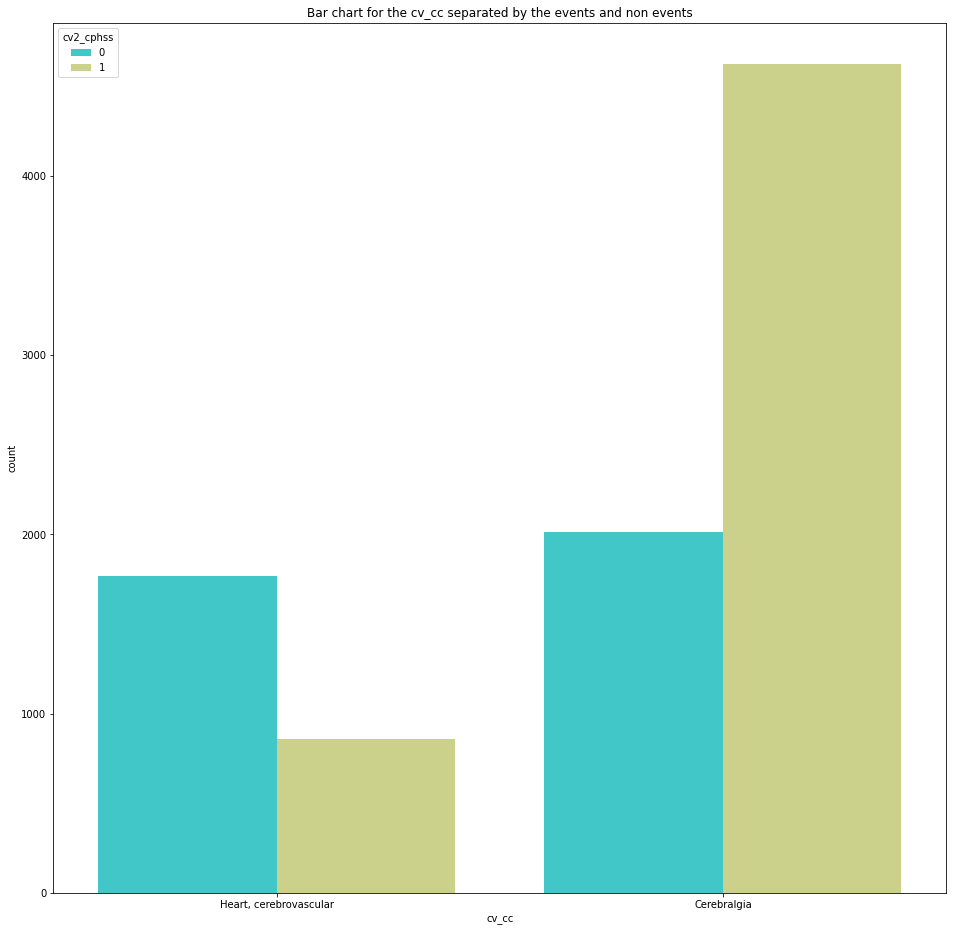

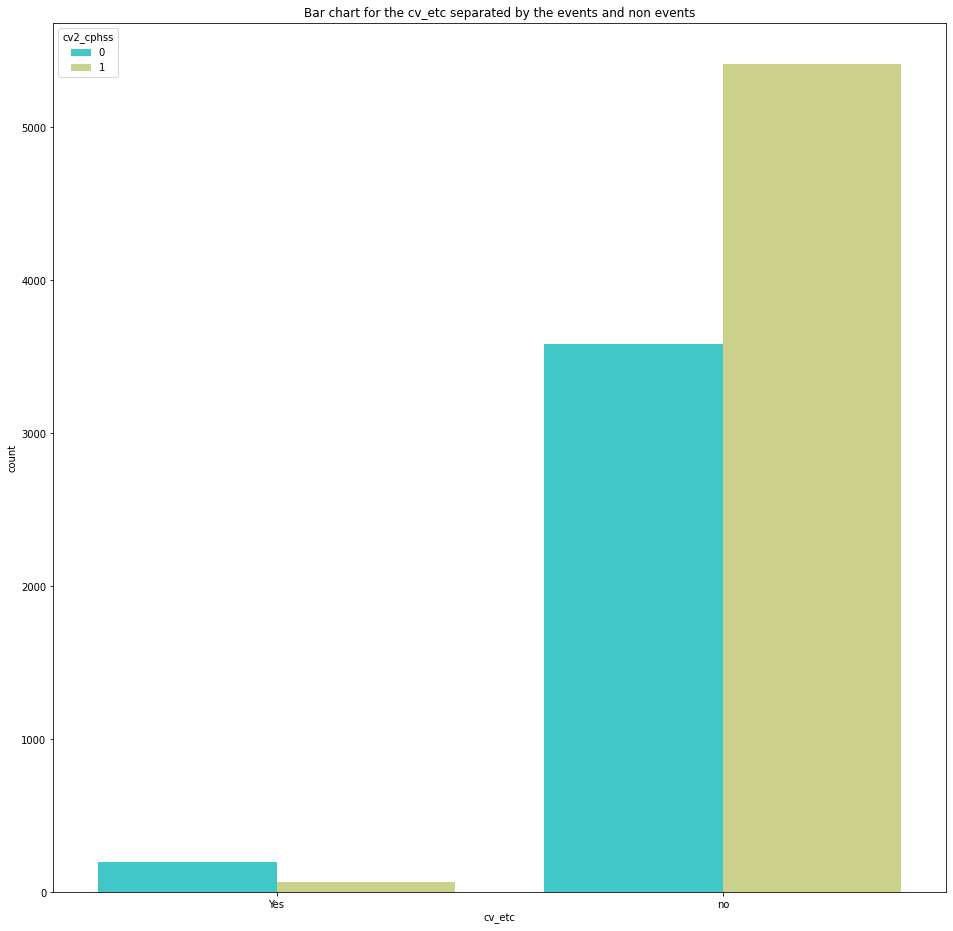

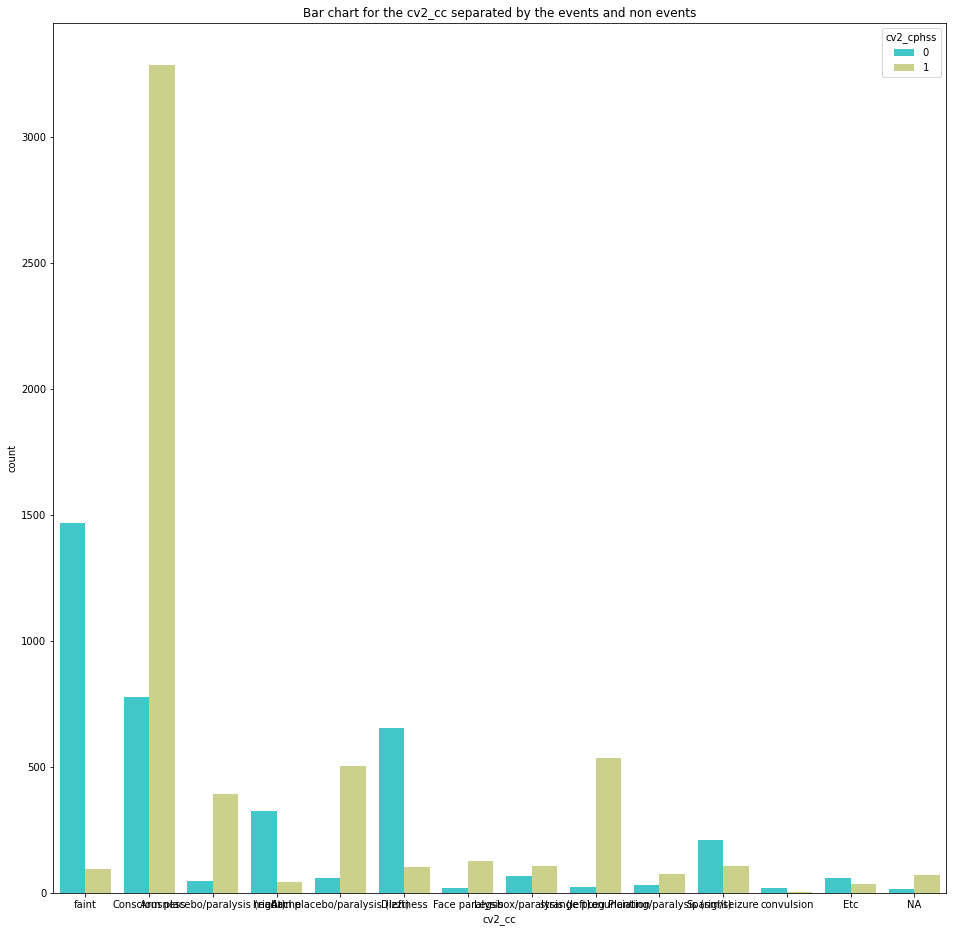

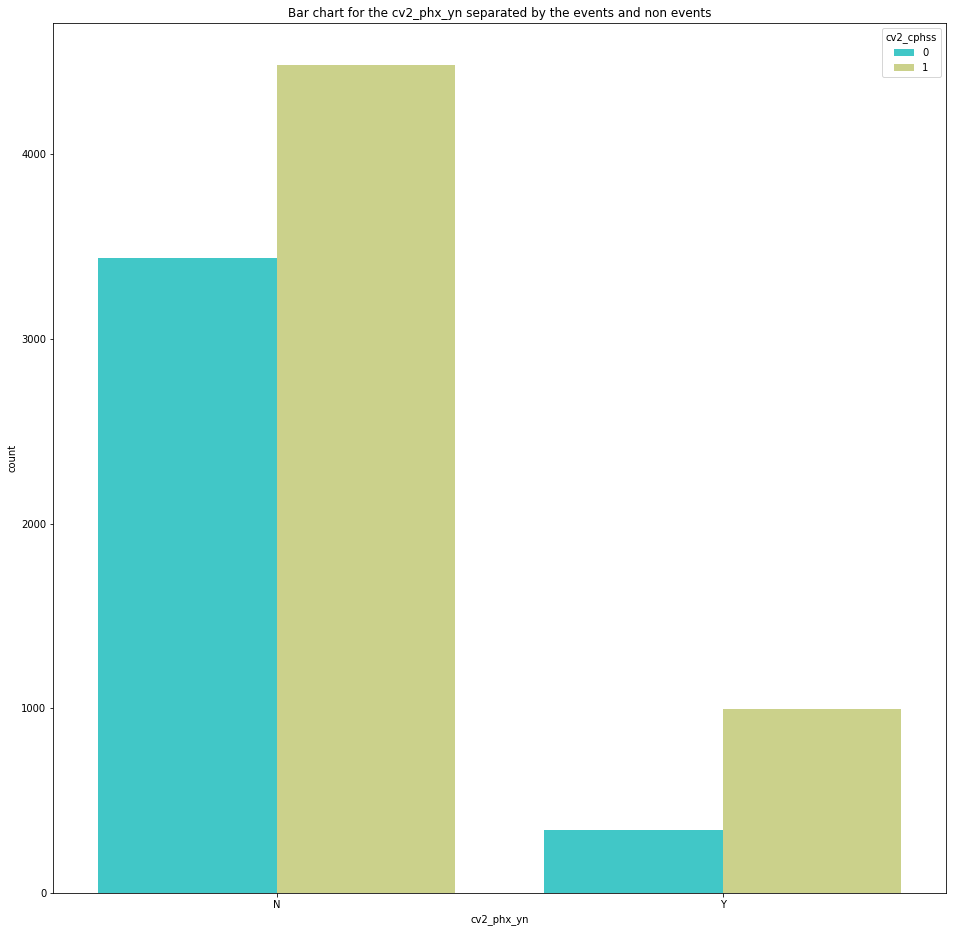

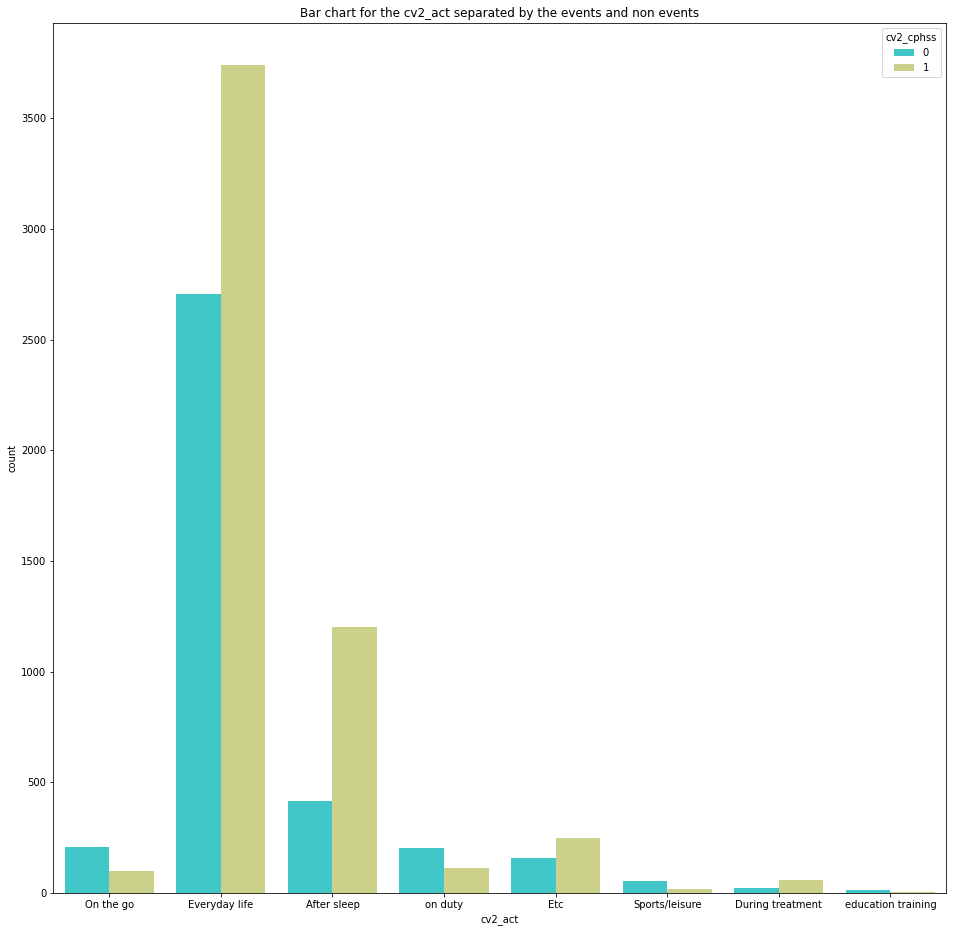

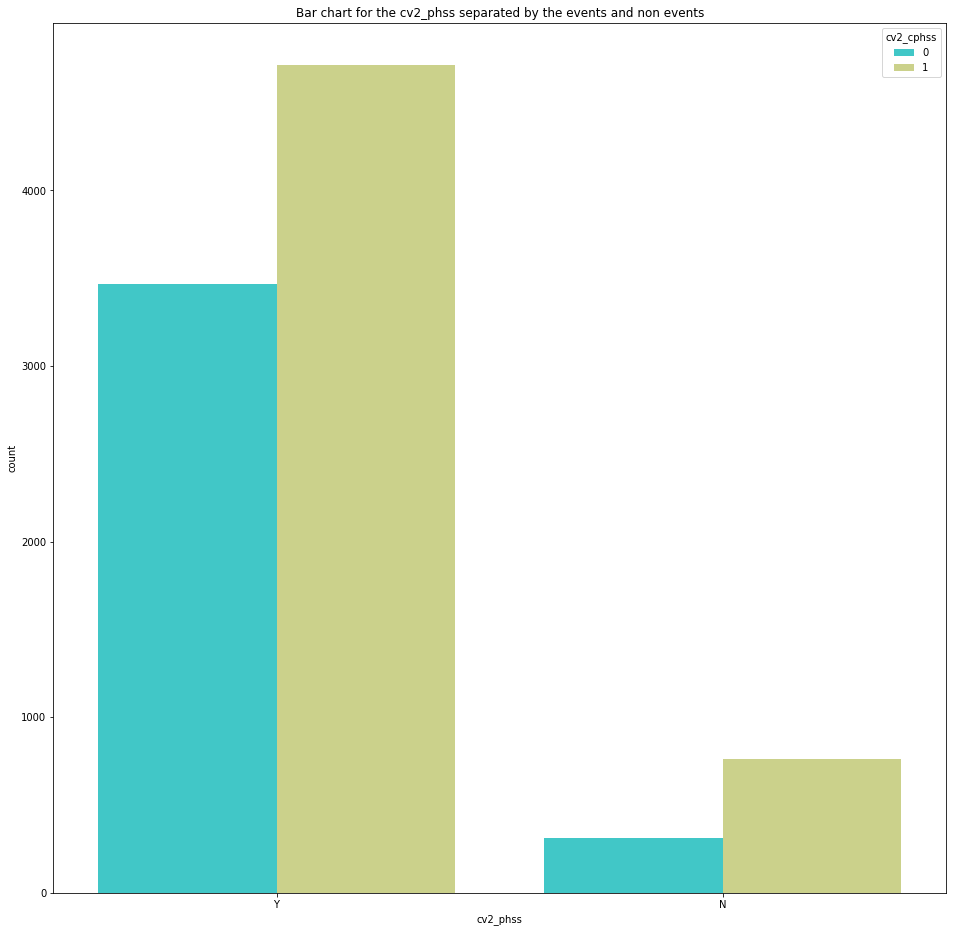

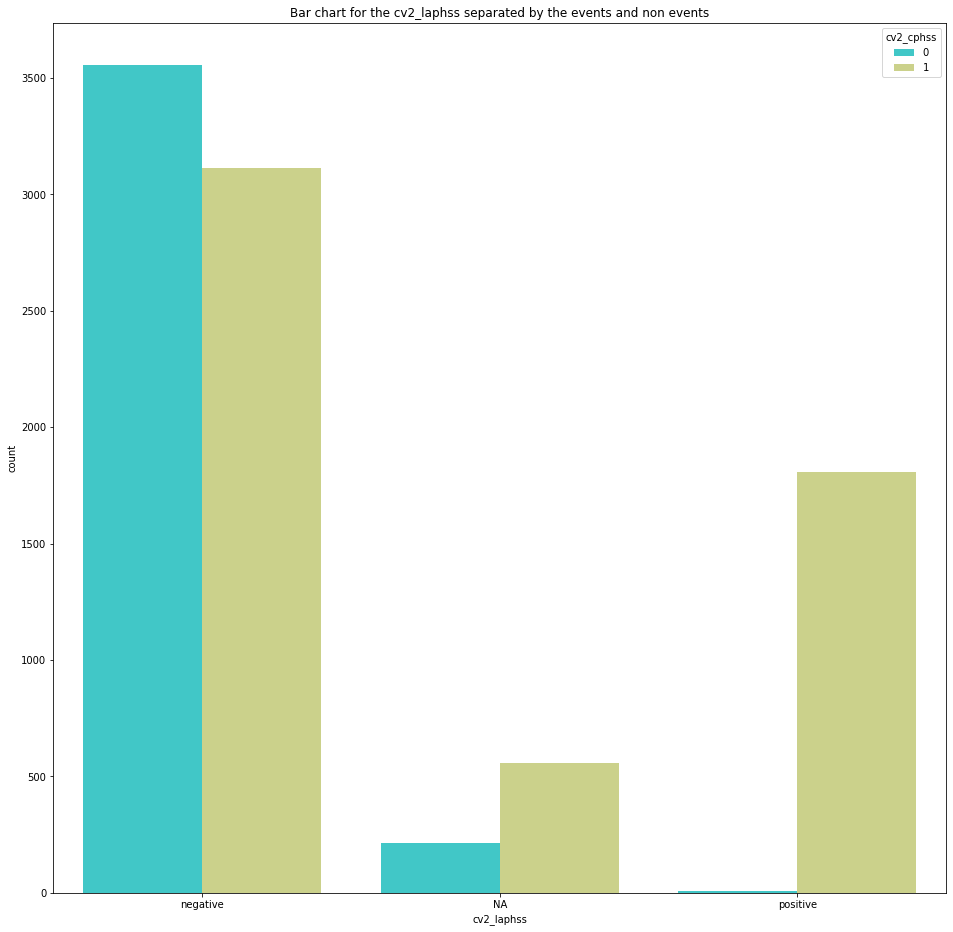

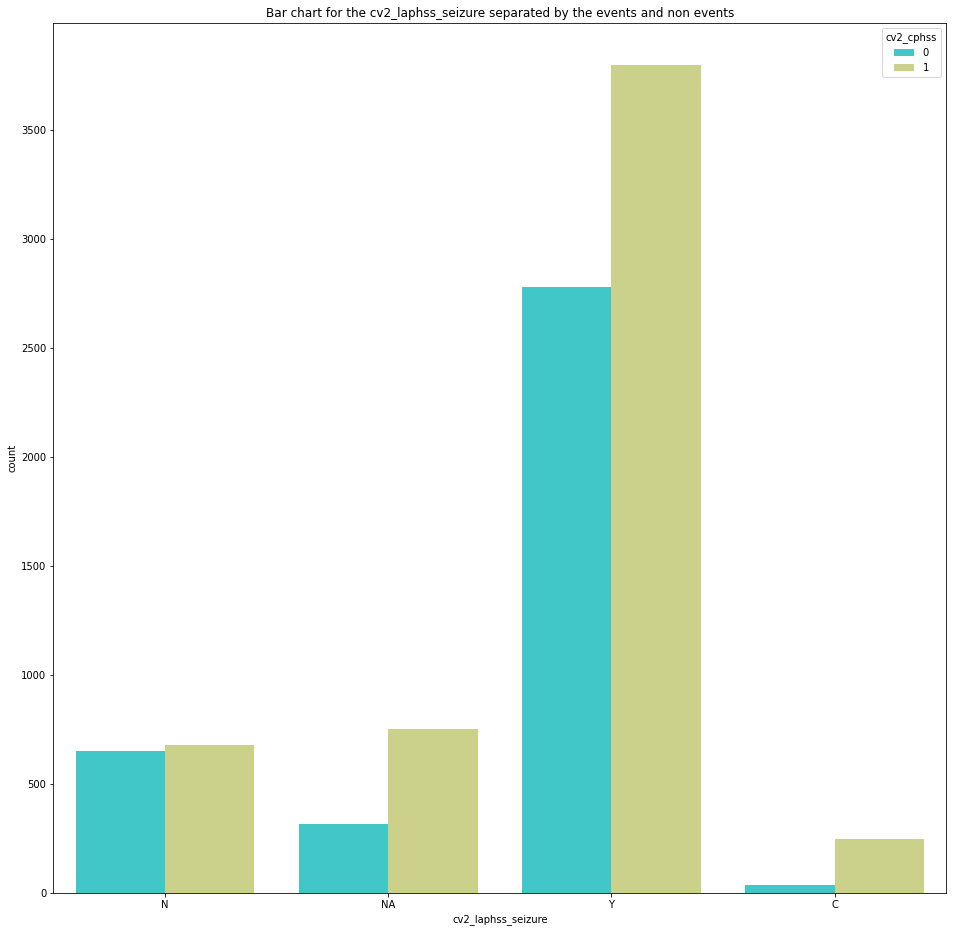

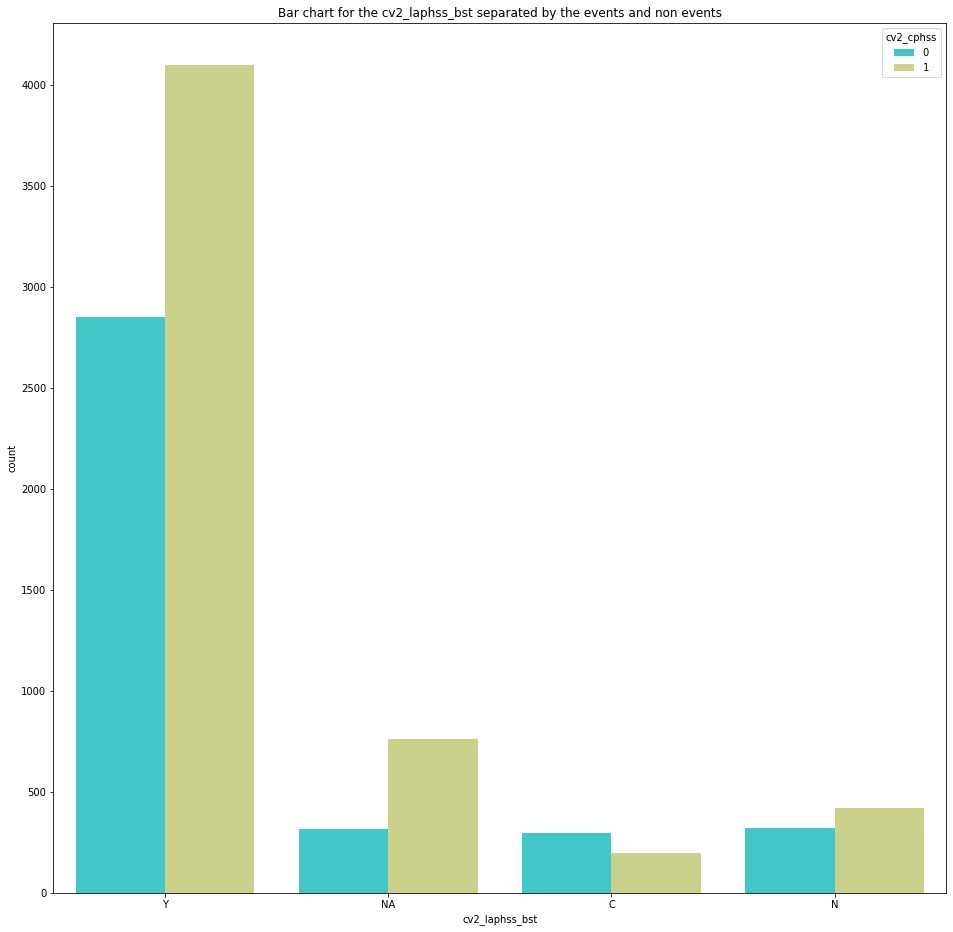

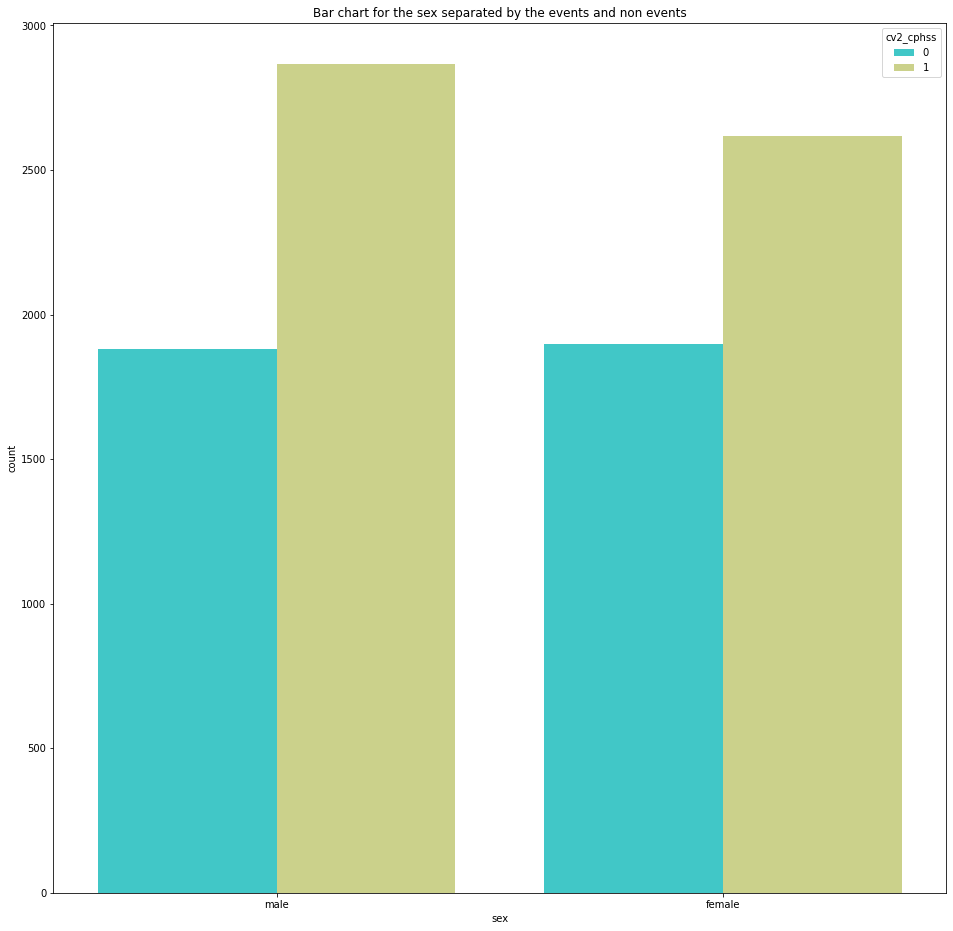

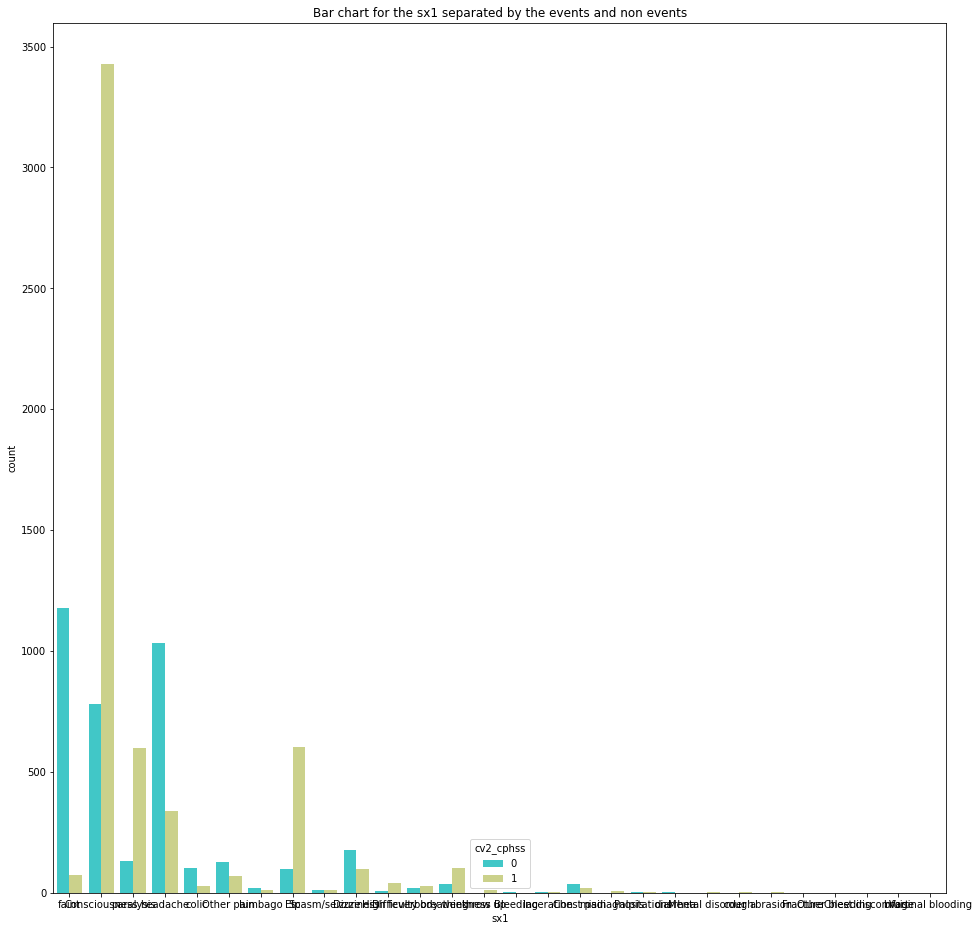

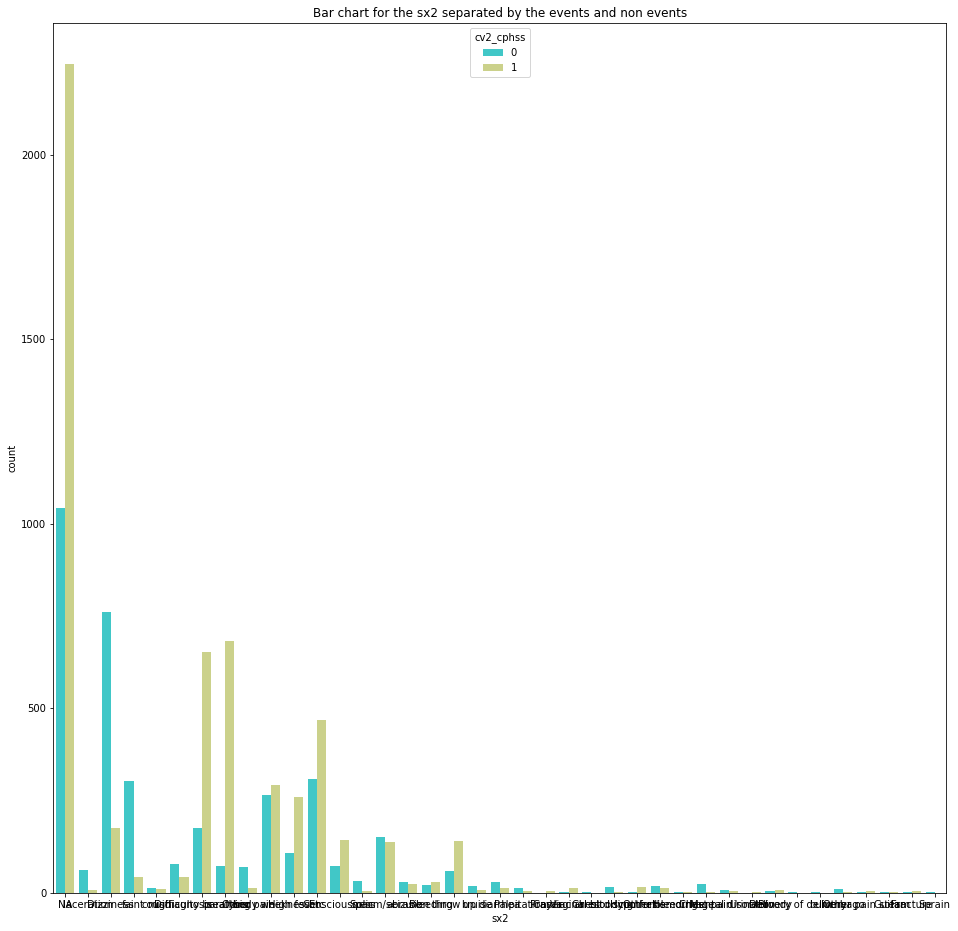

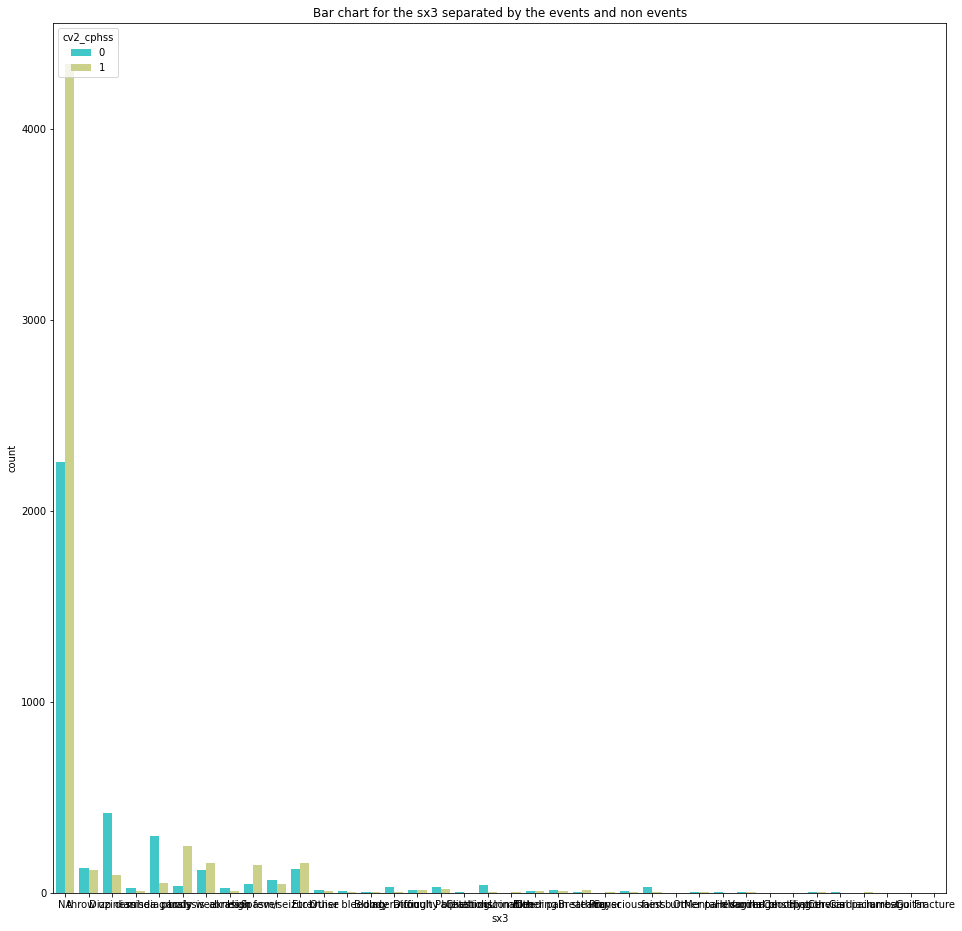

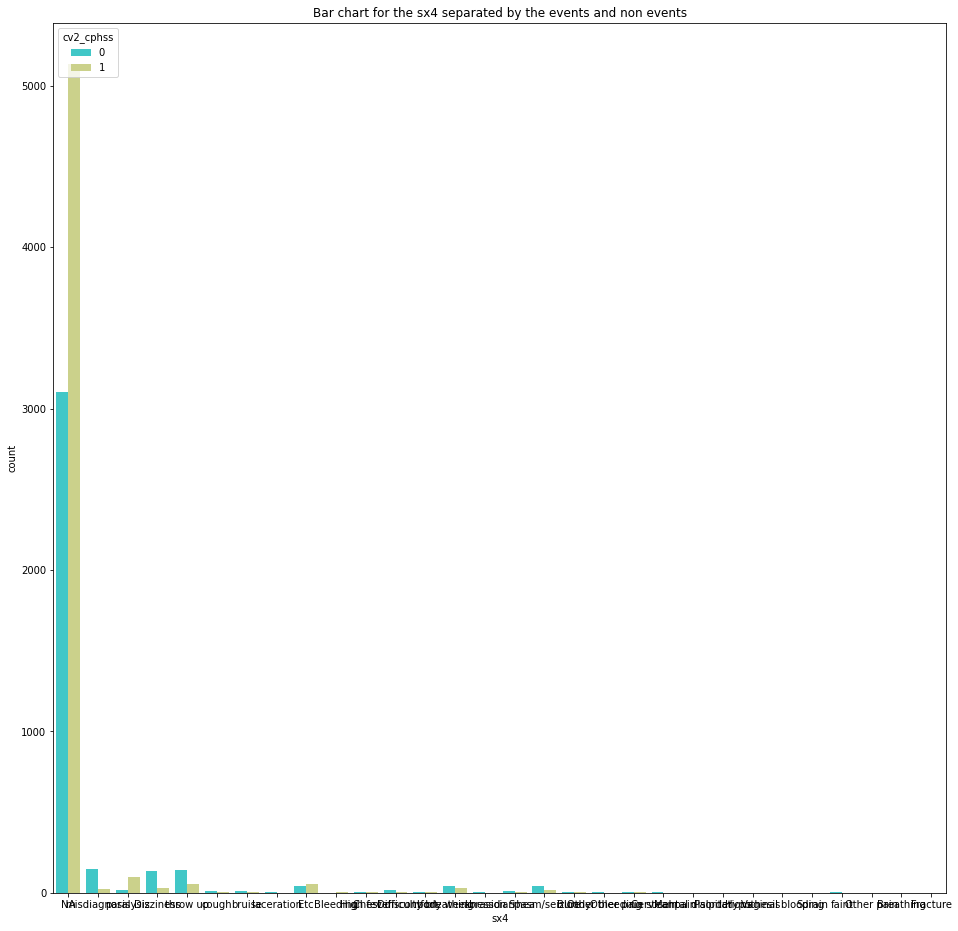

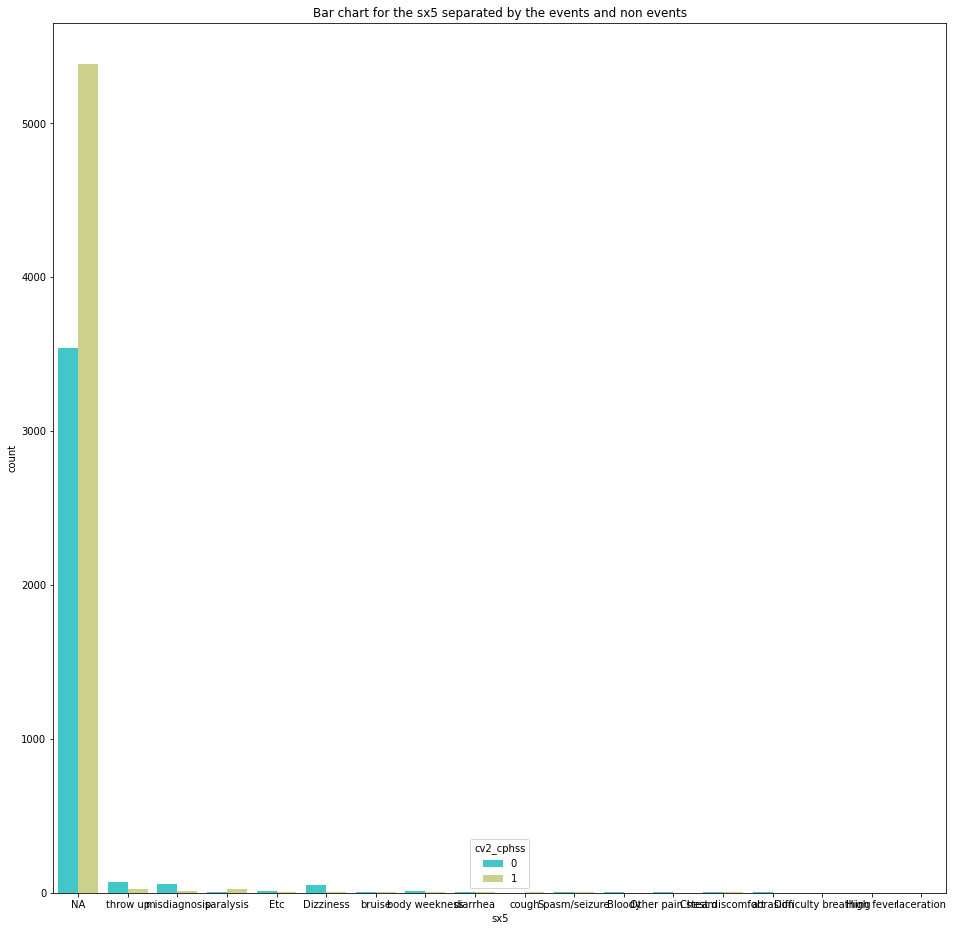

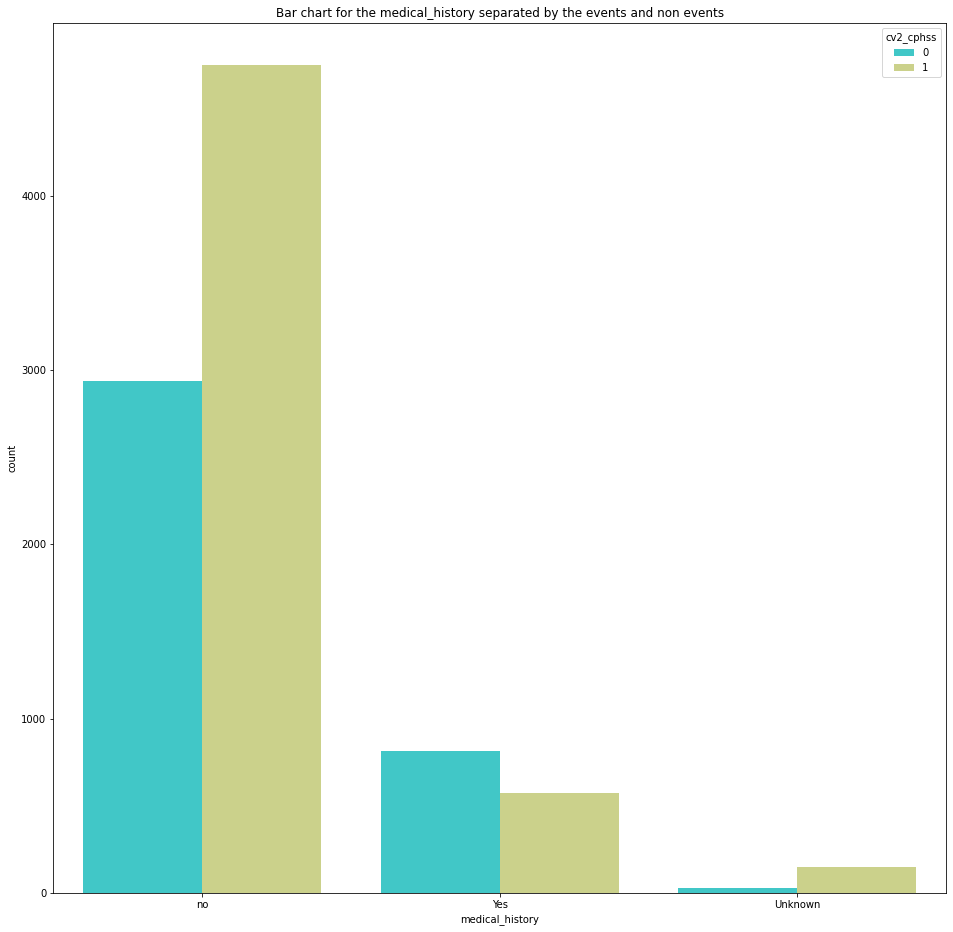

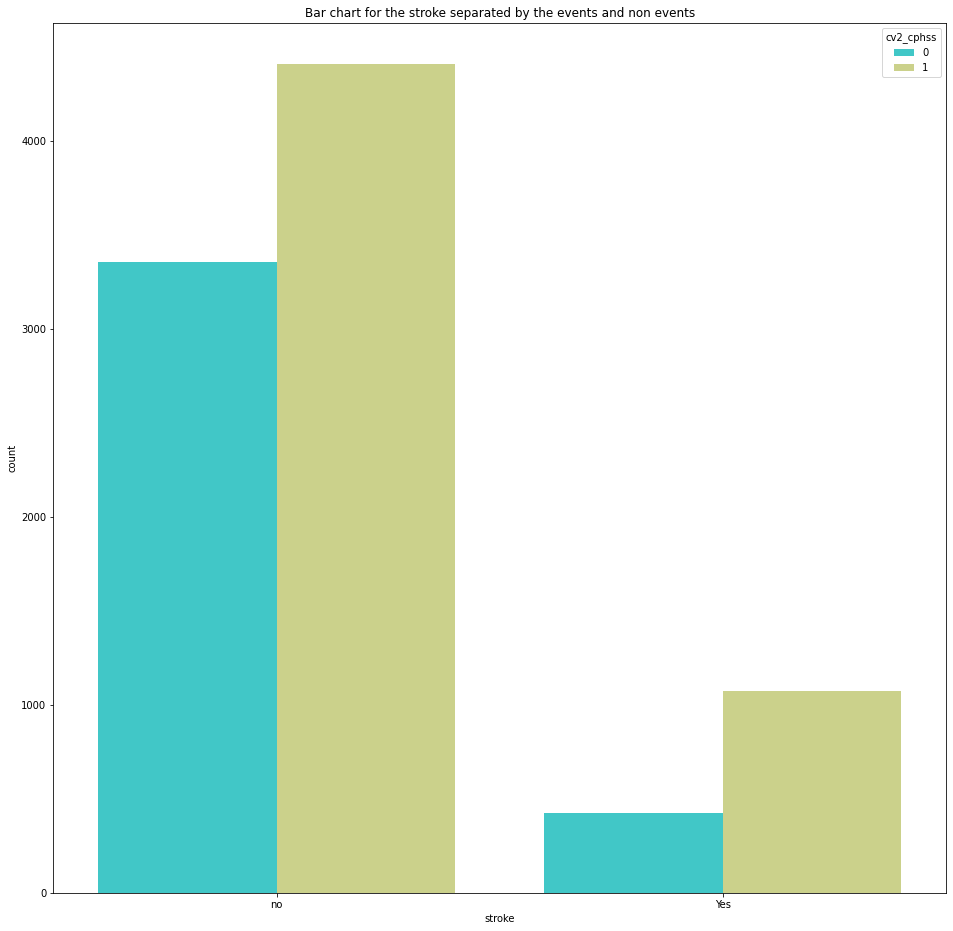

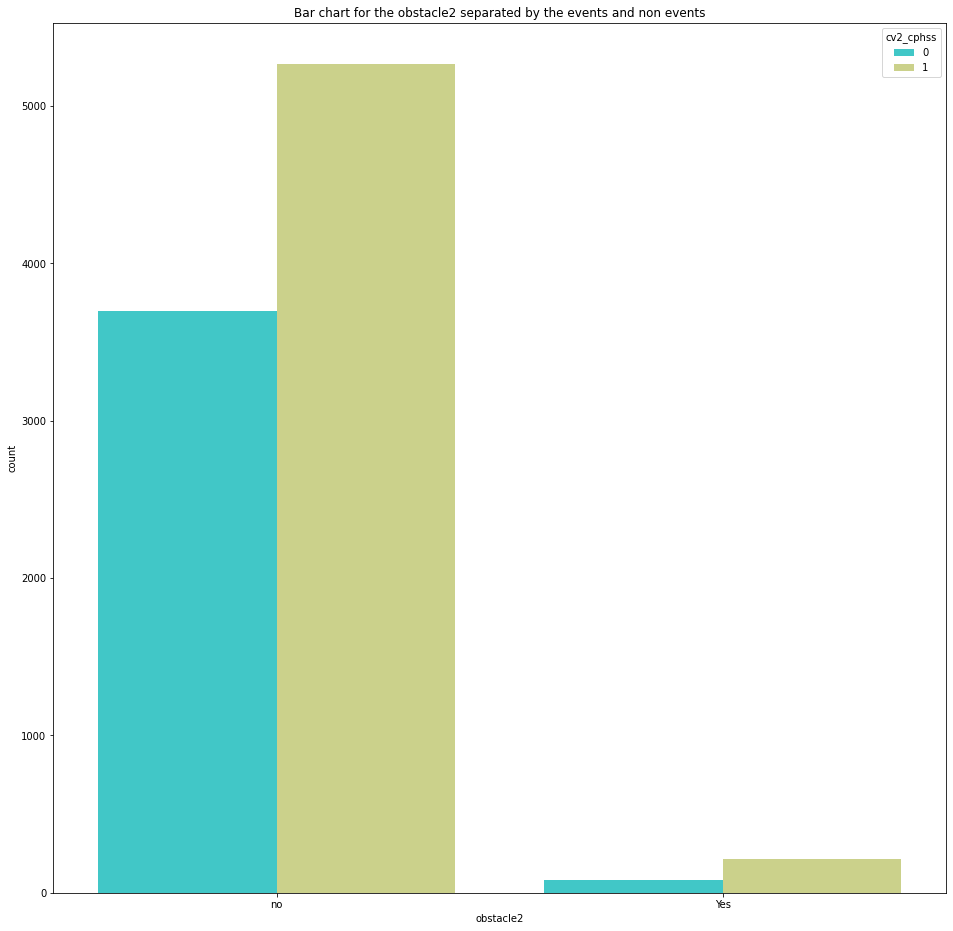

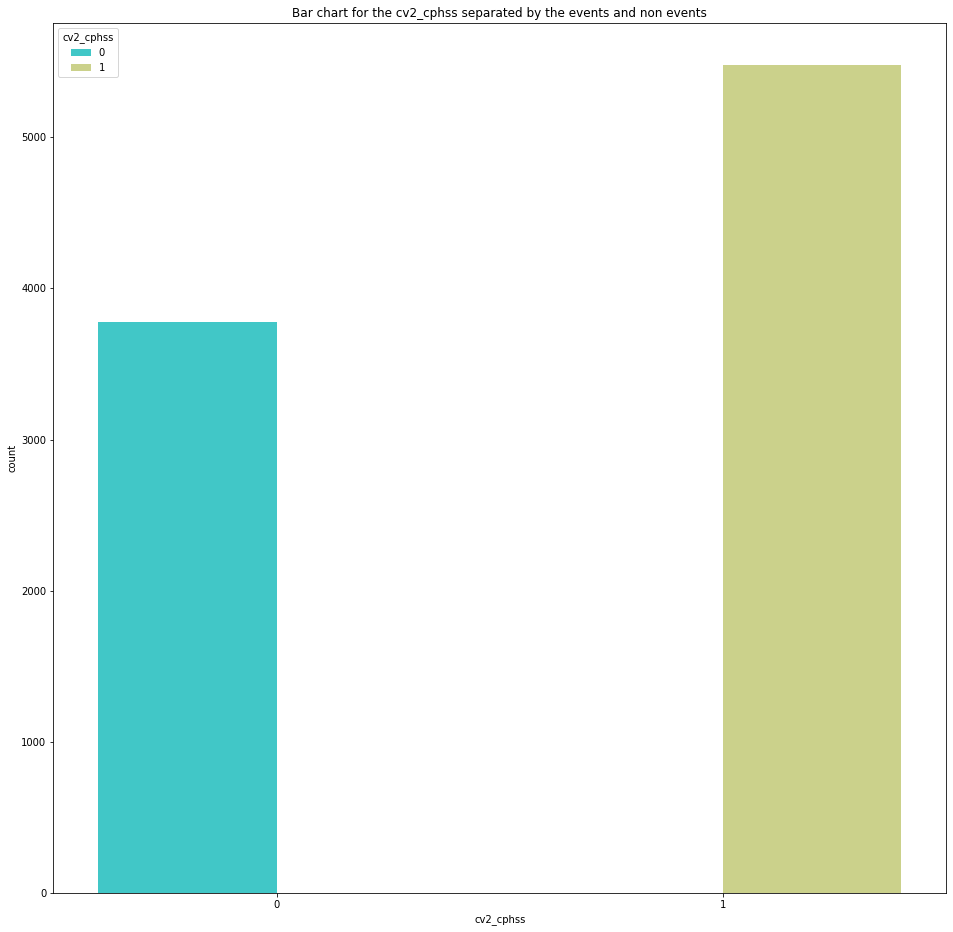

In [32]:
for var in cat_vars_final:
  plt.figure(figsize=(16,16))
  sns.countplot(x = var, data = final_data, palette = 'rainbow', hue = 'cv2_cphss')
  plt.title("Bar chart for the "+ var + " separated by the events and non events")

In [33]:
num_df = final_data[num_vars_final]
num_df['Target'] = final_data['cv2_cphss']
num_df = num_df.replace('NA', np.nan)
num_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(9261, 14)

In [34]:
num_df.head()

,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Target
1,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0,0
2,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0,0
4,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0,1
5,55,63.0,115.0,80.0,14.0,35.7,100.0,70.0,120.0,78.0,15.0,35.6,99.0,0
6,67,65.0,113.0,54.0,14.0,35.7,99.0,66.0,115.0,54.0,15.0,36.0,98.0,0


In [35]:
num_df = num_df.dropna()
num_df.shape

(7201, 14)

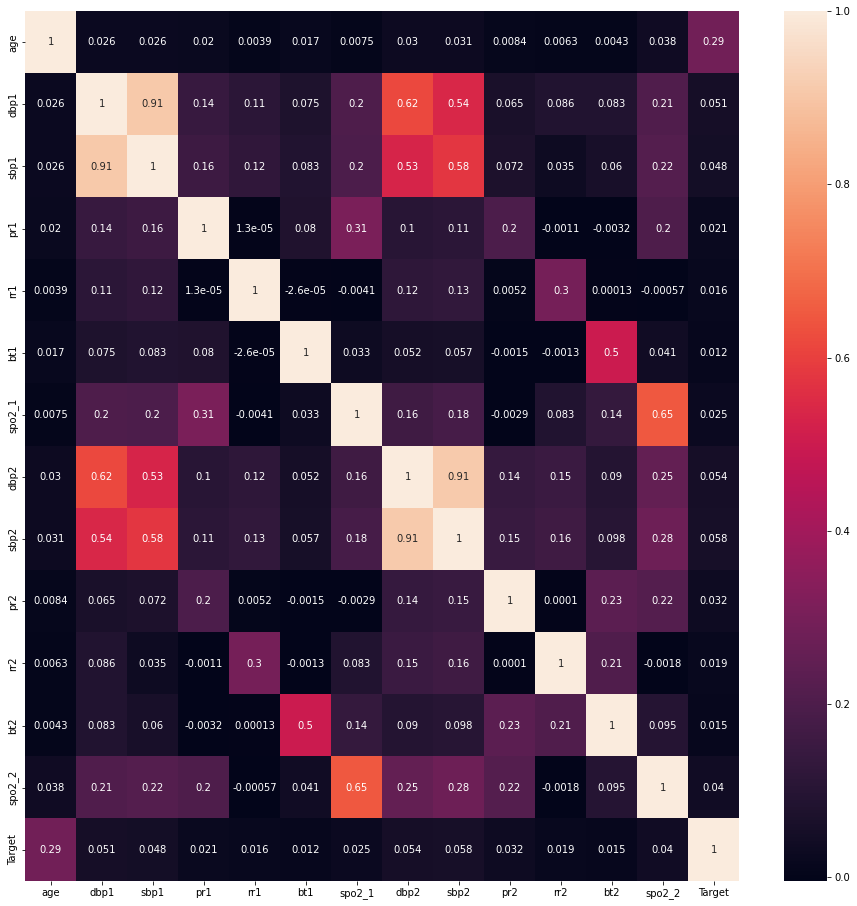

In [36]:
corrMatrix = num_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, annot=True)

plt.show()

Variables with high correlation are: 


1.   sbp1 and dbp1
2.   sbp2 and dbp2


when we remove all the nan records and consider rest of the records then we have the following composition
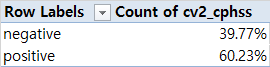




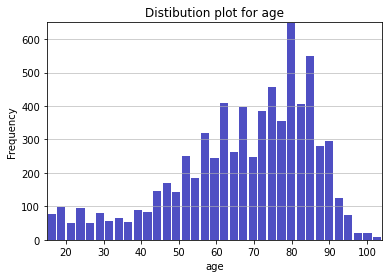

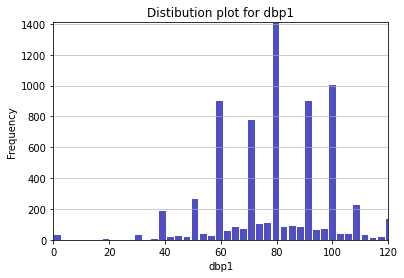

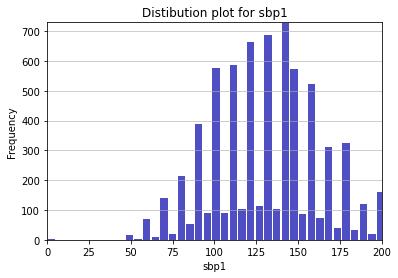

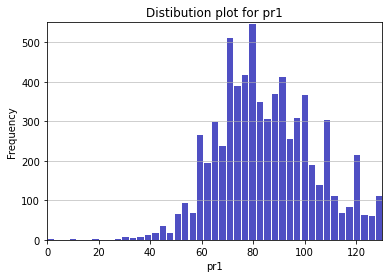

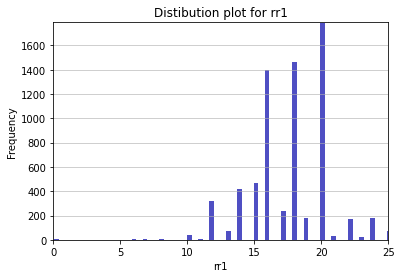

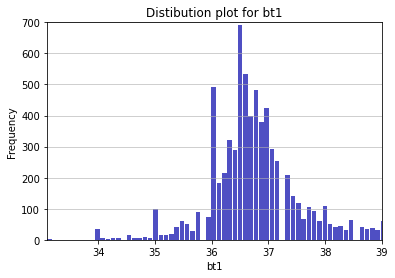

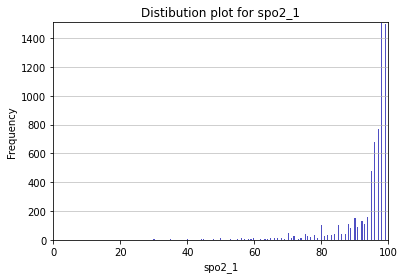

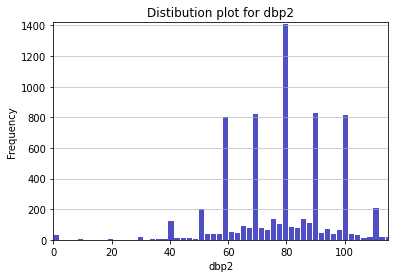

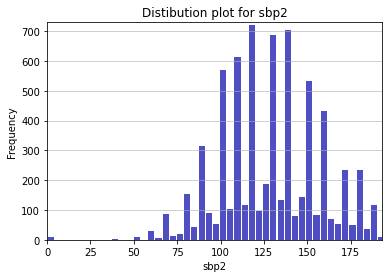

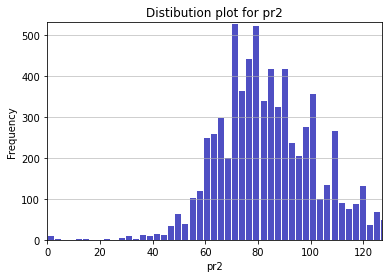

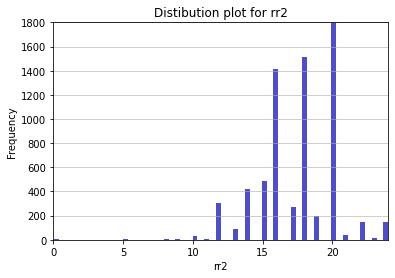

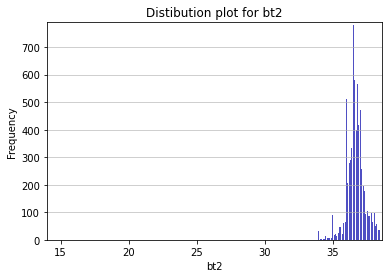

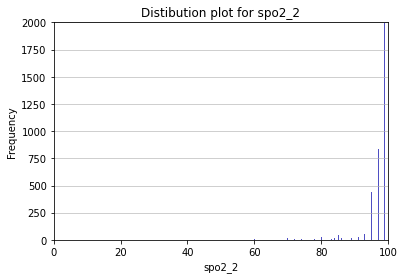

In [37]:
for column in num_vars_final:
  # An "interface" to matplotlib.axes.Axes.hist() method
  n, bins, patches = plt.hist(x=num_df[column], bins='auto', color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distibution plot for '+column)
  maxfreq = n.max()
  # Set the range of x-axis
  if (np.percentile(num_df[column], 100) - np.percentile(num_df[column], 98)) > 100:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 95))
  else:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 100))
  # Set the range of y-axis
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()

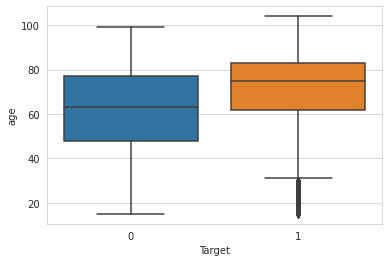

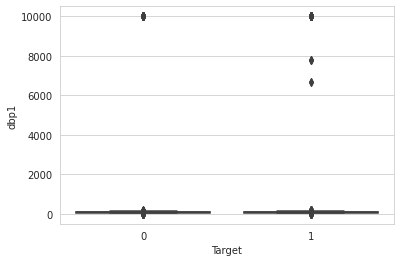

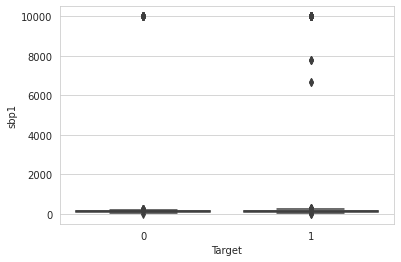

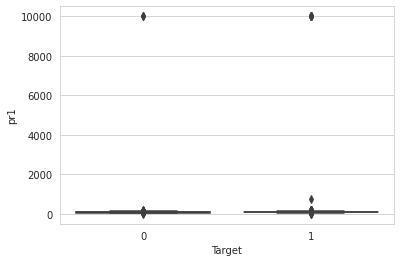

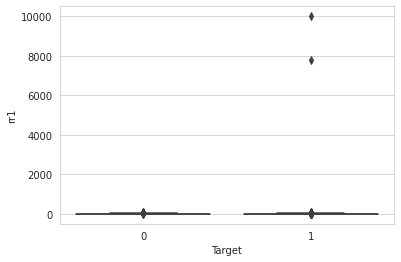

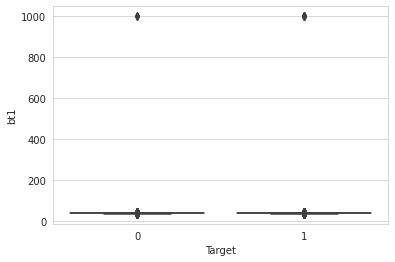

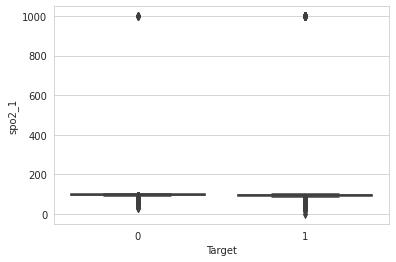

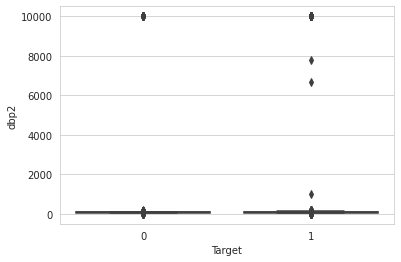

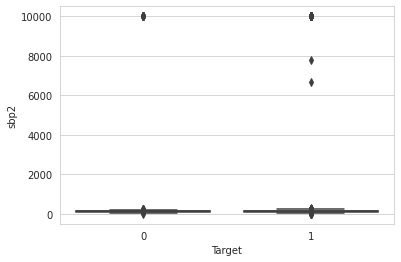

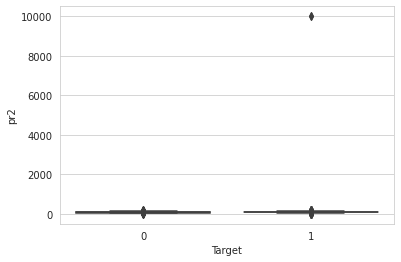

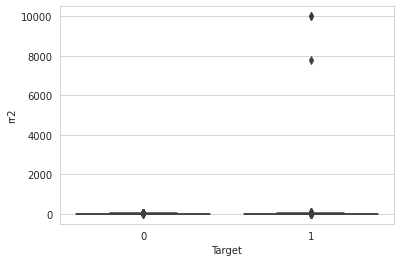

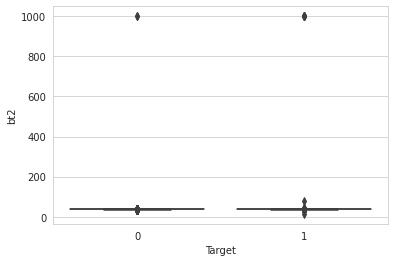

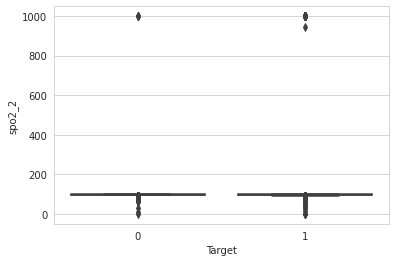

In [38]:
# box plot for the numerical variables since histogram shows that these variables do contain outliers
import seaborn as sns
sns.set_style("whitegrid")
for var in num_vars_final:
  sns.boxplot(x = 'Target', y = var, data = num_df)
  plt.show()

In [39]:
# 5-number summary
num_df.describe()

,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Target
count,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000,7201.000000
mean,67.045549,257.985974,278.705180,105.875017,20.674351,38.340592,100.540342,236.881822,264.049854,89.020553,21.914317,38.014192,102.384947,0.602277
std,18.545271,1309.041248,1186.852141,421.420769,149.029695,37.597397,75.638396,1233.128262,1132.338488,166.614044,189.833976,34.020506,70.408395,0.489462
min,15.000000,0.000000,0.000000,0.000000,0.000000,33.100000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,56.000000,70.000000,110.000000,72.000000,16.000000,36.300000,95.000000,70.000000,110.000000,72.000000,16.000000,36.400000,97.000000,0.000000
50%,71.000000,80.000000,130.000000,85.000000,18.000000,36.700000,97.000000,80.000000,130.000000,83.000000,18.000000,36.700000,98.000000,1.000000
75%,81.000000,98.000000,160.000000,100.000000,20.000000,37.200000,99.000000,90.000000,150.000000,98.000000,20.000000,37.100000,99.000000,1.000000
max,104.000000,9999.000000,9999.000000,9999.000000,9999.000000,999.900000,999.000000,9999.000000,9999.000000,9999.000000,9999.000000,999.900000,999.000000,1.000000


There seem to be many outliers in the positive class and values for them is not realistic so we will impute the outlier values by the median value in their respective classes except for the Age variable as it may be looking like outlier but it can be an actual value as well. Most of the values are in permissible range on the lower side amd it is going beyond the permissible range only on the upper side so we would gonna impute the values only on the upper side.

In [40]:
# As per dicussion with the data provider we got to know that there is no outlier as the values provided by them in captured manually so we will not do any treatment for the outliers
'''
for var in num_vars_final:
  if var == 'age':
    pass
  else:
    q95, q75, q25 = np.percentile(num_df[var], [95, 75 ,25])
    iqr = q75 - q25
    upper_limit = q75 + 2.5 * iqr
    print("Upper limit and q95 for "+ var + " : ", upper_limit, q95)
    filter_df = num_df[num_df[var] > upper_limit]
    print(filter_df[var].value_counts())
    print("---------------------------------------------------------------")

'''

'\nfor var in num_vars_final:\n  if var == \'age\':\n    pass\n  else:\n    q95, q75, q25 = np.percentile(num_df[var], [95, 75 ,25])\n    iqr = q75 - q25\n    upper_limit = q75 + 2.5 * iqr\n    print("Upper limit and q95 for "+ var + " : ", upper_limit, q95)\n    filter_df = num_df[num_df[var] > upper_limit]\n    print(filter_df[var].value_counts())\n    print("---------------------------------------------------------------")\n\n'

999, 999.9, 9999, 7777, 6666, 943 are the values that represent that no data was recorded so we need to treat these as the nulls

In [41]:
# we will replace the junk values with the nan
replace_values = {999.0 : np.nan, 999.9 : np.nan, 943.0 : np.nan, 9999.0 : np.nan, 7777.0 : np.nan, 6666.0 : np.nan, 770.0 : np.nan} 
num_df = num_df.replace(replace_values)

In [42]:
null_variables = round((num_df.isna().sum()/len(num_df))*100,2)
null_variables

age       0.00
dbp1      1.81
sbp1      1.50
pr1       0.19
rr1       0.03
bt1       0.15
spo2_1    0.69
dbp2      1.60
sbp2      1.35
pr2       0.03
rr2       0.04
bt2       0.12
spo2_2    0.61
Target    0.00
dtype: float64

In [43]:
# replacing the outliers by the median values of their respective classes 
# no replacement would be done since there is no outlier
'''
for var in num_vars_final:
  if var == 'age':
    pass
  else:
    q95, q75, q25 = np.percentile(num_df[var], [95, 75 ,25])
    iqr = q75 - q25
    upper_limit = q75 + 2 * iqr
    lower_limit = q25 - 2 * iqr
    filter_df = num_df[(num_df[var] < upper_limit) | (num_df[var] > lower_limit)]
    median_df = filter_df.groupby('Target', as_index=False)[var].median()
    num_df[var] = np.where((num_df[var] > upper_limit) & (num_df['Target'] == 1), median_df[var][1], np.where((num_df[var] > upper_limit) & (num_df['Target'] == 0), median_df[var][0], np.where((num_df[var] < lower_limit) & (num_df['Target'] == 1), median_df[var][1], np.where((num_df[var] < lower_limit) & (num_df['Target'] == 0), median_df[var][0], num_df[var]))))

'''

"\nfor var in num_vars_final:\n  if var == 'age':\n    pass\n  else:\n    q95, q75, q25 = np.percentile(num_df[var], [95, 75 ,25])\n    iqr = q75 - q25\n    upper_limit = q75 + 2 * iqr\n    lower_limit = q25 - 2 * iqr\n    filter_df = num_df[(num_df[var] < upper_limit) | (num_df[var] > lower_limit)]\n    median_df = filter_df.groupby('Target', as_index=False)[var].median()\n    num_df[var] = np.where((num_df[var] > upper_limit) & (num_df['Target'] == 1), median_df[var][1], np.where((num_df[var] > upper_limit) & (num_df['Target'] == 0), median_df[var][0], np.where((num_df[var] < lower_limit) & (num_df['Target'] == 1), median_df[var][1], np.where((num_df[var] < lower_limit) & (num_df['Target'] == 0), median_df[var][0], num_df[var]))))\n\n"

In [44]:
num_df = num_df.dropna()
num_df.shape

(6984, 14)

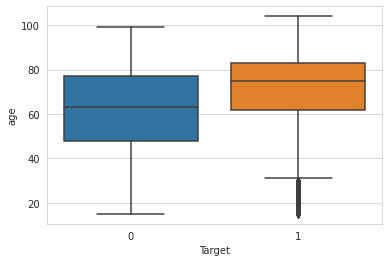

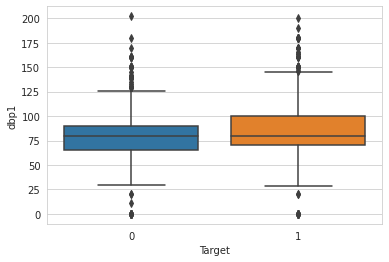

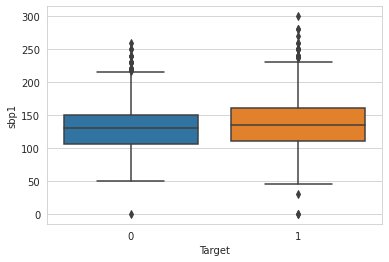

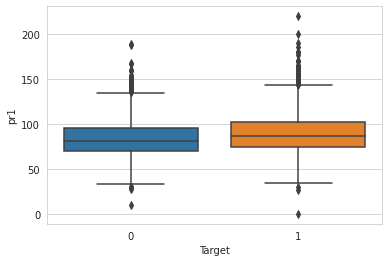

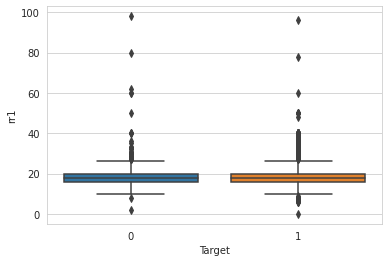

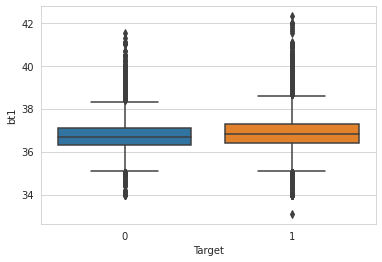

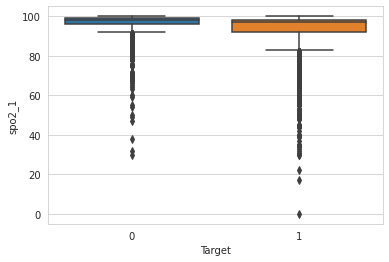

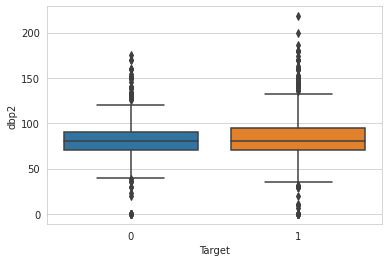

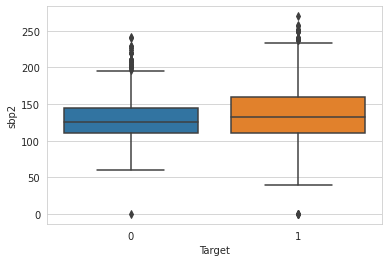

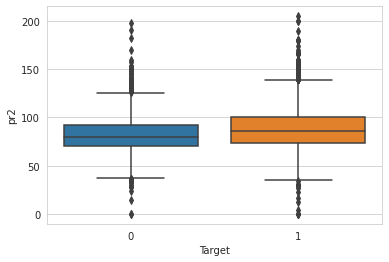

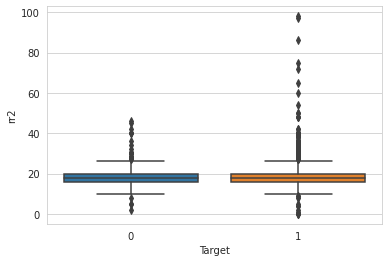

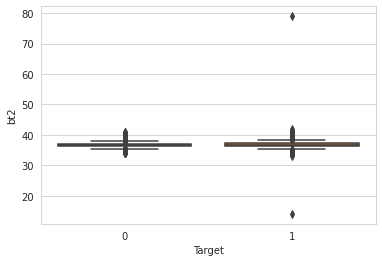

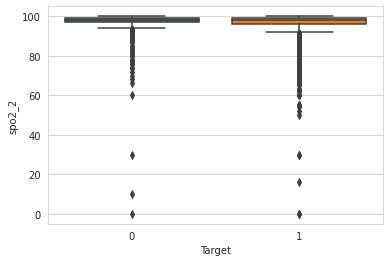

In [45]:
for var in num_vars_final:
  sns.boxplot(x = 'Target', y = var, data = num_df)
  plt.show()

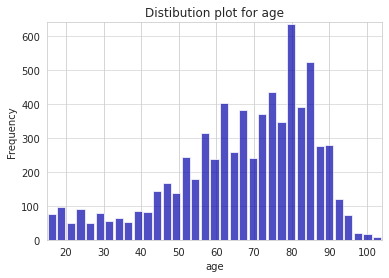

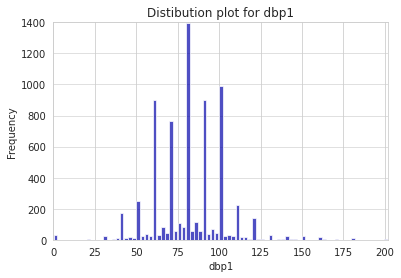

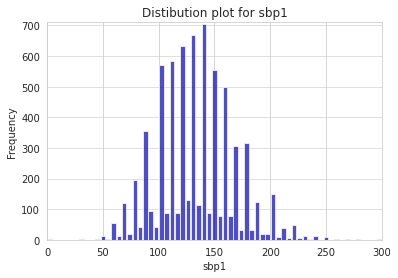

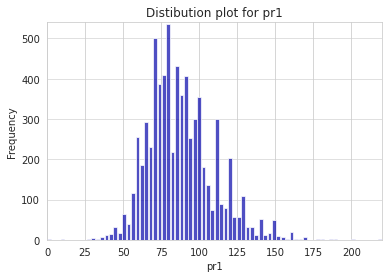

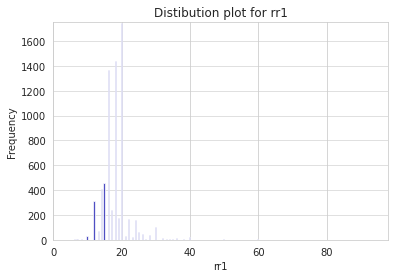

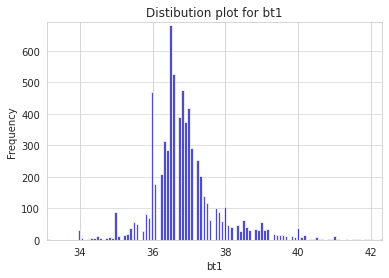

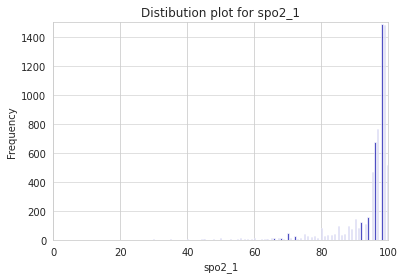

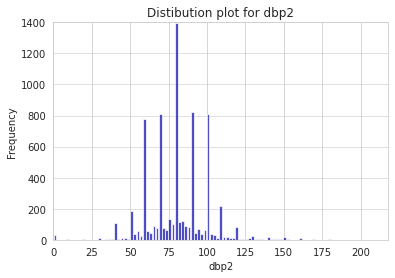

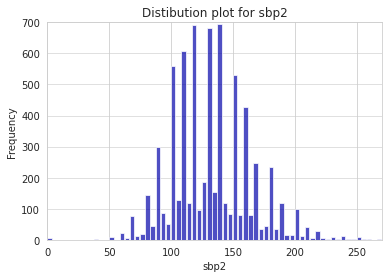

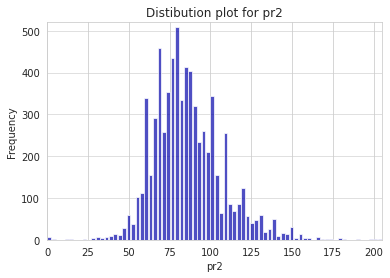

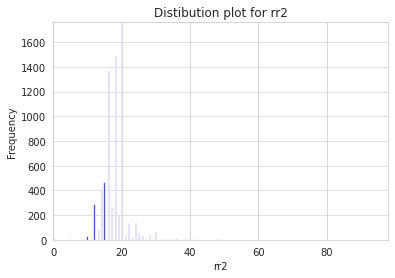

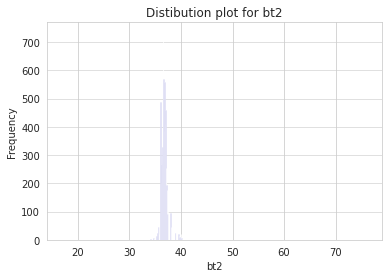

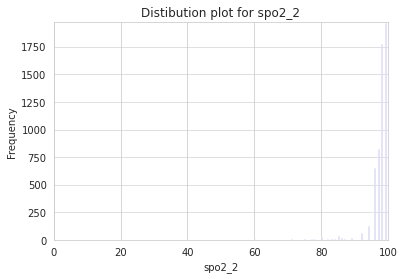

In [46]:
for column in num_vars_final:
  # An "interface" to matplotlib.axes.Axes.hist() method
  n, bins, patches = plt.hist(x=num_df[column], bins='auto', color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distibution plot for '+column)
  maxfreq = n.max()
  # Set the range of x-axis
  if (np.percentile(num_df[column], 100) - np.percentile(num_df[column], 98)) > 100:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 95))
  else:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 100))
  # Set the range of y-axis
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()

In [47]:
final_data.head()

,cv_cc,cv_etc,cv2_cc,cv2_phx_yn,cv2_act,cv2_phss,cv2_laphss,cv2_laphss_seizure,cv2_laphss_bst,sex,sx1,sx2,sx3,sx4,sx5,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2
1,"Heart, cerebrovascular",Yes,faint,N,On the go,Y,negative,N,Y,male,faint,NA,NA,NA,NA,no,no,no,0,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0
2,"Heart, cerebrovascular",no,faint,N,Everyday life,Y,negative,N,Y,male,faint,laceration,NA,NA,NA,no,no,no,0,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0
4,Cerebralgia,no,Consciousness,N,After sleep,Y,negative,N,Y,male,Consciousness,NA,NA,NA,NA,no,no,no,1,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0
5,Cerebralgia,no,Consciousness,N,After sleep,N,NA,NA,NA,female,Consciousness,NA,NA,NA,NA,no,no,no,0,55,63.0,115.0,80.0,14.0,35.7,100.0,70.0,120.0,78.0,15.0,35.6,99.0
6,"Heart, cerebrovascular",no,faint,N,on duty,Y,negative,Y,Y,male,faint,Dizziness,throw up,NA,NA,no,no,no,0,67,65.0,113.0,54.0,14.0,35.7,99.0,66.0,115.0,54.0,15.0,36.0,98.0


In [48]:
def spasm(row):  
    if row['sx1'] == 'Spasm/seizure' or row['sx2'] == 'Spasm/seizure' or row['sx3'] == 'Spasm/seizure' or row['sx4'] == 'Spasm/seizure' or row['sx5'] == 'Spasm/seizure':
        return 1
    return 0

def dizziness(row):  
    if row['sx1'] == 'Dizziness' or row['sx2'] == 'Dizziness' or row['sx3'] == 'Dizziness' or row['sx4'] == 'Dizziness' or row['sx5'] == 'Dizziness':
        return 1
    return 0

def faint(row):  
    if row['sx1'] == 'faint' or row['sx2'] == 'faint' or row['sx3'] == 'faint' or row['sx4'] == 'faint' or row['sx5'] == 'faint':
        return 1
    return 0

def consciousness(row):  
    if row['sx1'] == 'Consciousness' or row['sx2'] == 'Consciousness' or row['sx3'] == 'Consciousness' or row['sx4'] == 'Consciousness' or row['sx5'] == 'Consciousness':
        return 1
    return 0

def paralysis(row):  
    if row['sx1'] == 'paralysis' or row['sx2'] == 'paralysis' or row['sx3'] == 'paralysis' or row['sx4'] == 'paralysis' or row['sx5'] == 'paralysis':
        return 1
    return 0

final_data['Spasm'] = final_data.apply(lambda row: spasm(row), axis=1)
final_data['Dizziness'] = final_data.apply(lambda row: dizziness(row), axis=1)
final_data['Faint'] = final_data.apply(lambda row: faint(row), axis=1)
final_data['Consciousness'] = final_data.apply(lambda row: consciousness(row), axis=1)
final_data['Paralysis'] = final_data.apply(lambda row: paralysis(row), axis=1)

final_data.head()

,cv_cc,cv_etc,cv2_cc,cv2_phx_yn,cv2_act,cv2_phss,cv2_laphss,cv2_laphss_seizure,cv2_laphss_bst,sex,sx1,sx2,sx3,sx4,sx5,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,Faint,Consciousness,Paralysis
1,"Heart, cerebrovascular",Yes,faint,N,On the go,Y,negative,N,Y,male,faint,NA,NA,NA,NA,no,no,no,0,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0,0,0,1,0,0
2,"Heart, cerebrovascular",no,faint,N,Everyday life,Y,negative,N,Y,male,faint,laceration,NA,NA,NA,no,no,no,0,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0,0,0,1,0,0
4,Cerebralgia,no,Consciousness,N,After sleep,Y,negative,N,Y,male,Consciousness,NA,NA,NA,NA,no,no,no,1,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0,0,0,0,1,0
5,Cerebralgia,no,Consciousness,N,After sleep,N,NA,NA,NA,female,Consciousness,NA,NA,NA,NA,no,no,no,0,55,63.0,115.0,80.0,14.0,35.7,100.0,70.0,120.0,78.0,15.0,35.6,99.0,0,0,0,1,0
6,"Heart, cerebrovascular",no,faint,N,on duty,Y,negative,Y,Y,male,faint,Dizziness,throw up,NA,NA,no,no,no,0,67,65.0,113.0,54.0,14.0,35.7,99.0,66.0,115.0,54.0,15.0,36.0,98.0,0,1,1,0,0


In [49]:
final_data.columns

Index(['cv_cc', 'cv_etc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'cv2_phss',
       'cv2_laphss', 'cv2_laphss_seizure', 'cv2_laphss_bst', 'sex', 'sx1',
       'sx2', 'sx3', 'sx4', 'sx5', 'medical_history', 'stroke', 'obstacle2',
       'cv2_cphss', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1',
       'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Spasm', 'Dizziness',
       'Faint', 'Consciousness', 'Paralysis'],
      dtype='object')

In [50]:
model_vars = ['cv_cc', 'cv_etc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history', 'stroke', 'obstacle2',
       'cv2_cphss', 'age', 'dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1',
       'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2', 'Spasm', 'Dizziness',
       'Faint', 'Consciousness', 'Paralysis']

model_data = final_data[model_vars]

In [51]:
print(model_data.shape)
model_data.head()

(9261, 28)


,cv_cc,cv_etc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,Faint,Consciousness,Paralysis
1,"Heart, cerebrovascular",Yes,faint,N,On the go,male,no,no,no,0,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0,0,0,1,0,0
2,"Heart, cerebrovascular",no,faint,N,Everyday life,male,no,no,no,0,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0,0,0,1,0,0
4,Cerebralgia,no,Consciousness,N,After sleep,male,no,no,no,1,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0,0,0,0,1,0
5,Cerebralgia,no,Consciousness,N,After sleep,female,no,no,no,0,55,63.0,115.0,80.0,14.0,35.7,100.0,70.0,120.0,78.0,15.0,35.6,99.0,0,0,0,1,0
6,"Heart, cerebrovascular",no,faint,N,on duty,male,no,no,no,0,67,65.0,113.0,54.0,14.0,35.7,99.0,66.0,115.0,54.0,15.0,36.0,98.0,0,1,1,0,0


In [52]:
replace_values = {999.0 : np.nan, 999.9 : np.nan, 943.0 : np.nan, 9999.0 : np.nan, 7777.0 : np.nan, 6666.0 : np.nan, 'NA' : np.nan, 770.0 : np.nan} 

model_data = model_data.replace(replace_values)

null_variables = round((model_data.isna().sum()/len(final_data))*100,2)
null_variables

cv_cc               0.00
cv_etc              0.00
cv2_cc              0.92
cv2_phx_yn          0.00
cv2_act             0.00
sex                 0.00
medical_history     0.00
stroke              0.00
obstacle2           0.00
cv2_cphss           0.00
age                 0.00
dbp1                3.74
sbp1                1.98
pr1                 0.46
rr1                 0.37
bt1                 0.57
spo2_1              1.09
dbp2               20.53
sbp2               19.37
pr2                18.00
rr2                18.56
bt2                20.45
spo2_2             18.23
Spasm               0.00
Dizziness           0.00
Faint               0.00
Consciousness       0.00
Paralysis           0.00
dtype: float64

In [53]:
#model_data['cv2_laphss'] = model_data['cv2_laphss'].replace(np.nan, 'NA')
#model_data['cv2_laphss_seizure'] = model_data['cv2_laphss_seizure'].replace(np.nan, 'NA')
#model_data['cv2_laphss_bst'] = model_data['cv2_laphss_bst'].replace(np.nan, 'NA')
#model_data['cv2_laphss_asym'] = model_data['cv2_laphss_asym'].replace(np.nan, 'NA')


null_variables = round((model_data.isna().sum()/len(final_data))*100,2)
null_variables

cv_cc               0.00
cv_etc              0.00
cv2_cc              0.92
cv2_phx_yn          0.00
cv2_act             0.00
sex                 0.00
medical_history     0.00
stroke              0.00
obstacle2           0.00
cv2_cphss           0.00
age                 0.00
dbp1                3.74
sbp1                1.98
pr1                 0.46
rr1                 0.37
bt1                 0.57
spo2_1              1.09
dbp2               20.53
sbp2               19.37
pr2                18.00
rr2                18.56
bt2                20.45
spo2_2             18.23
Spasm               0.00
Dizziness           0.00
Faint               0.00
Consciousness       0.00
Paralysis           0.00
dtype: float64

In [54]:
model_data_final = model_data.copy()
model_data = model_data.dropna()
model_data.shape

(6900, 28)

In [55]:
model_data_final.shape

(9261, 28)

In [56]:
'''

outliers_vars = ['dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1']

for var in outliers_vars:
  if var == 'age':
    pass
  else:
    q95, q75, q25 = np.percentile(model_data[var], [95, 75 ,25])
    iqr = q75 - q25
    upper_limit = q75 + 2 * iqr
    lower_limit = q25 - 2 * iqr
    filter_df = model_data[(model_data[var] < upper_limit) | (model_data[var] > lower_limit)]
    median_df = filter_df.groupby('cv2_cphss', as_index=False)[var].median()
    model_data[var] = np.where((model_data[var] > upper_limit) & (model_data['cv2_cphss'] == 1), median_df[var][1], np.where((model_data[var] > upper_limit) & (model_data['cv2_cphss'] == 0), median_df[var][0], np.where((model_data[var] < lower_limit) & (model_data['cv2_cphss'] == 1), median_df[var][1], np.where((model_data[var] < lower_limit) & (model_data['cv2_cphss'] == 0), median_df[var][0], model_data[var]))))

for var in outliers_vars:
  sns.boxplot(x = 'Target', y = var, data = num_df)
  plt.show()
  
'''

"\n\noutliers_vars = ['dbp1', 'sbp1', 'pr1', 'rr1', 'bt1', 'spo2_1']\n\nfor var in outliers_vars:\n  if var == 'age':\n    pass\n  else:\n    q95, q75, q25 = np.percentile(model_data[var], [95, 75 ,25])\n    iqr = q75 - q25\n    upper_limit = q75 + 2 * iqr\n    lower_limit = q25 - 2 * iqr\n    filter_df = model_data[(model_data[var] < upper_limit) | (model_data[var] > lower_limit)]\n    median_df = filter_df.groupby('cv2_cphss', as_index=False)[var].median()\n    model_data[var] = np.where((model_data[var] > upper_limit) & (model_data['cv2_cphss'] == 1), median_df[var][1], np.where((model_data[var] > upper_limit) & (model_data['cv2_cphss'] == 0), median_df[var][0], np.where((model_data[var] < lower_limit) & (model_data['cv2_cphss'] == 1), median_df[var][1], np.where((model_data[var] < lower_limit) & (model_data['cv2_cphss'] == 0), median_df[var][0], model_data[var]))))\n\nfor var in outliers_vars:\n  sns.boxplot(x = 'Target', y = var, data = num_df)\n  plt.show()\n  \n"

In [57]:
model_data.head()

,cv_cc,cv_etc,cv2_cc,cv2_phx_yn,cv2_act,sex,medical_history,stroke,obstacle2,cv2_cphss,age,dbp1,sbp1,pr1,rr1,bt1,spo2_1,dbp2,sbp2,pr2,rr2,bt2,spo2_2,Spasm,Dizziness,Faint,Consciousness,Paralysis
1,"Heart, cerebrovascular",Yes,faint,N,On the go,male,no,no,no,0,79,49.0,87.0,64.0,12.0,36.0,97.0,54.0,102.0,65.0,12.0,36.6,98.0,0,0,1,0,0
2,"Heart, cerebrovascular",no,faint,N,Everyday life,male,no,no,no,0,59,48.0,94.0,84.0,20.0,36.3,97.0,68.0,104.0,90.0,20.0,36.3,97.0,0,0,1,0,0
4,Cerebralgia,no,Consciousness,N,After sleep,male,no,no,no,1,77,80.0,155.0,110.0,18.0,38.0,87.0,84.0,140.0,112.0,18.0,38.0,97.0,0,0,0,1,0
5,Cerebralgia,no,Consciousness,N,After sleep,female,no,no,no,0,55,63.0,115.0,80.0,14.0,35.7,100.0,70.0,120.0,78.0,15.0,35.6,99.0,0,0,0,1,0
6,"Heart, cerebrovascular",no,faint,N,on duty,male,no,no,no,0,67,65.0,113.0,54.0,14.0,35.7,99.0,66.0,115.0,54.0,15.0,36.0,98.0,0,1,1,0,0


In [58]:
fasgdhfnykgm,lasfdfn

NameError: ignored

In [ ]:
## Factorizing the categorical columns
model_cat_vars = ['cv_cc', 'cv_etc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'sex', 'medical_history', 'stroke', 'obstacle2']
model_data[model_cat_vars] = model_data[model_cat_vars].apply(lambda x: pd.factorize(x)[0])

model_data.head()

cv2_cc doesn't seem important as we are getting the same info from the variables created from sx1-sx5 so we will not use the cv2_cc in our model

In [ ]:
## Data splitting and scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = model_data.iloc[:,model_data.columns != 'cv2_cphss']
y = model_data.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)


In [ ]:
X_train.shape

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

In [ ]:
#model.coef_

In [ ]:
y_pred = model.predict(X_test_scaled)

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
X_train.columns

Trying to reduce the variables to upto 15

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary2())

In [ ]:
X_train.columns

In [ ]:
filtered_vars = ['cv_cc', 'cv2_phx_yn', 'cv2_act','medical_history', 'age', 'pr1', 'spo2_1', 'pr2', 'Spasm', 'Dizziness', 'Faint', 'Consciousness', 'Paralysis', 'cv2_cphss']
model_data_2 = model_data_final[filtered_vars]
model_data_2 = model_data_2.dropna()
## Factorizing the categorical columns
model_cat_vars = ['cv_cc', 'cv2_phx_yn', 'cv2_act','medical_history']
model_data_2[model_cat_vars] = model_data_2[model_cat_vars].apply(lambda x: pd.factorize(x)[0])
model_data_2.shape

In [ ]:
## Data splitting and scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = model_data_2.iloc[:,model_data_2.columns != 'cv2_cphss']
y = model_data_2.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [ ]:
filtered_vars = ['cv_cc', 'cv2_phx_yn', 'cv2_act','medical_history', 'age', 'pr1', 'spo2_1', 'pr2', 'Spasm', 'Dizziness', 'Faint', 'Consciousness', 'Paralysis']
X_train_2 = X_train[filtered_vars]
X_test_2 = X_test[filtered_vars]

scaler = preprocessing.StandardScaler().fit(X_train_2)
X_train_scaled_2 = scaler.transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)


model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_scaled_2, y_train)
train_acc = model.score(X_train_scaled_2, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

y_pred = model.predict(X_test_scaled_2)

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled_2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
## Running the model without Symptoms variables
filtered_vars = ['cv_cc', 'cv2_phx_yn', 'cv2_act','medical_history', 'age', 'pr1', 'spo2_1', 'pr2']
X_train_2 = X_train[filtered_vars]
X_test_2 = X_test[filtered_vars]

scaler = preprocessing.StandardScaler().fit(X_train_2)
X_train_scaled_2 = scaler.transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)


model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_scaled_2, y_train)
train_acc = model.score(X_train_scaled_2, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

y_pred = model.predict(X_test_scaled_2)

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled_2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_scaled_2)
result=logit_model.fit()
print(result.summary2())

We will try and remove the coefficients that have p value higher than 0.05 and see the improvement in our logistic regression model


Data Provider had emphasized on the fact that BP, spo2 and oter values would be important in detecting the stroke but out preliminary analysis shows that p values are not significant for these.

Here we see that pvalue for pulse rate (pr1 & pr2) is high so we will drop these two and check the p values again for rest of the variables.

In [ ]:
X_train.columns

In [ ]:
train_1 = np.delete(X_train_scaled, [14, 20], 1)
test1 = np.delete(X_test_scaled, [14, 20], 1)
train_1.shape

['cv_cc', 'cv_etc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'cv2_phss',
       'cv2_laphss', 'cv2_laphss_asym', 'sex', 'medical_history', 'stroke',
       'age', 'dbp1', 'sbp1', 'rr1', 'bt1', 'spo2_1', 'dbp2', 'sbp2',
      'rr2', 'bt2', 'spo2_2', 'Spasm', 'Dizziness', 'Faint',
       'Consciousness', 'Paralysis']

In [ ]:
logit_model=sm.Logit(y_train,train_1)
result=logit_model.fit()
print(result.summary2())

In [ ]:
model = LogisticRegression()
model.fit(train_1, y_train)
train_acc = model.score(train_1, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

In [ ]:
y_pred = model.predict(test1)

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

In [ ]:
print(classification_report(y_test, y_pred))

After dropping the pulse rate we see that performance has improved but still we see many variables which have p value greater the 0.05 so in this iteration we will remove the respiratory rate counts i.e. rr1 amd rr2


['cv_cc', 'cv_etc', 'cv2_cc', 'cv2_phx_yn', 'cv2_act', 'cv2_phss', 'cv2_laphss', 'cv2_laphss_asym', 'sex', 'medical_history', 'stroke', 'age', 'dbp1', 'sbp1', 'bt1', 'spo2_1', 'dbp2', 'sbp2', 'bt2', 'spo2_2', 'Spasm', 'Dizziness', 'Faint', 'Consciousness', 'Paralysis']

In [ ]:
train_2 = np.delete(train_1, [14, 19], 1)
test_2 = np.delete(test1, [14, 19], 1)
print(train_2.shape)
logit_model=sm.Logit(y_train,train_2)
result=logit_model.fit()
print(result.summary2())

In [ ]:
model = LogisticRegression()
model.fit(train_2, y_train)
train_acc = model.score(train_2, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

In [ ]:
y_pred = model.predict(test_2)

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', max_depth = 5, min_samples_leaf = 3, min_samples_split = 5) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

In [ ]:
#X_train.columns

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

In [ ]:
filter_vars = ['Faint',
'Dizziness',
'Consciousness',
'Paralysis',
'cv_cc',
'spo2_1',
'age',
'sbp2',
'pr2',
'spo2_2',
'dbp2',
'Spasm',
'rr1',
'rr2',
'sbp1',
'cv2_phss',
'bt1',
'pr1',
'dbp1',
'cv2_phx_yn',
'bt2',
'stroke',
'sex',
'cv2_act',
'cv_etc',
'medical_history',
'obstacle2']

X_train_temp = X_train[filter_vars]
X_test_temp = X_test[filter_vars]

# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_temp, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_temp)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_temp, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

feature_imp = pd.Series(clf.feature_importances_, index = X_train_temp.columns).sort_values(ascending = False)
feature_imp

In [ ]:
filter_vars = ['Faint',
'Dizziness',
'Consciousness',
'Paralysis',
'cv_cc',
'spo2_1',
'age',
'sbp2',
'pr2',
'spo2_2',
'dbp2',
'Spasm',
'rr1',
'rr2',
'sbp1',
'bt1',
'pr1',
'dbp1',
'bt2',
'stroke',
'sex',
'medical_history',
'obstacle2']

X_train_temp = X_train[filter_vars]
X_test_temp = X_test[filter_vars]

# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_temp, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_temp)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train_temp, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

feature_imp = pd.Series(clf.feature_importances_, index = X_train_temp.columns).sort_values(ascending = False)
feature_imp